<a href="https://colab.research.google.com/github/MiguelFigueroa02/IA_Ciencia_de_datos/blob/main/IA_aplicada_a_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong><font color="7b71ff">IA aplicada a Data Science: Utilizando IA en la construcci√≥n de visualizaciones de datos</font></strong>


---

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/logos/logo_branca_fundo_azul.png" alt="inserir alt">

# **Aula 1 - Conociendo los datos**

 Zoop es una gran minorista que atiende a todas las regiones de M√©xico a trav√©s de su e-commerce. Es conocida por la amplia variedad de productos que ofrece, buscando satisfacer a todo tipo de p√∫blico. Posee una serie de centros de distribuci√≥n (CDs) para la entrega de sus productos, la mayor√≠a de ellos situados en el estado de Mexico.

Para gestionar su alcance, as√≠ como la facturaci√≥n de su sector en tiendas online, consolida los datos en diferentes per√≠odos de tiempo y eval√∫a estos datos para generar insights y tomar decisiones estrat√©gicas en su negocio. En este proyecto, tendremos acceso a los datos de parte de su clientela de e-commerce durante el a√±o 2023.

T√∫, como analista de datos de la empresa, necesitar√°s generar visualizaciones que ayuden en la elaboraci√≥n de informes de acuerdo con algunas premisas proporcionadas por las partes interesadas, realizando un r√°pido an√°lisis de la clientela que tenemos en la tienda virtual y de la facturaci√≥n de la empresa.

**Problema de negocio:**

El equipo de datos de Zoop necesita extraer los datos y generar informaci√≥n a trav√©s de visuales que puedan presentarse a la directiva de la empresa, destacando los datos de facturaci√≥n, perfil del cliente y otros indicadores que puedan ayudar en la toma de decisiones en su tienda online.

**Base de datos**

Vamos a importar dos bases de datos:

Datos de los clientes del e-commerce de Zoop, separados por el c√≥digo identificador de la compra.

Datos de ventas del e-commerce de Zoop en 2023, separados por el c√≥digo identificador de la compra.

Estos datos se leer√°n desde el repositorio compartido en GitHub.

**Desaf√≠o**

T√∫, como analista de datos del equipo de datos de Zoop, tienes el desaf√≠o de extraer los datos de ambas bases y construir visualizaciones que puedan agregar valor a la presentaci√≥n de los resultados de Zoop en 2023. Para ello, se te presentar√°n 7 preguntas para que puedas contribuir en la construcci√≥n del storytelling de las ventas de la empresa.

Para agilizar el proceso de an√°lisis exploratorio de datos (AED) y la creaci√≥n de visuales, utilizaremos la IA de ChatGPT como nuestra asistente, teniendo en cuenta el corto plazo para los an√°lisis y la calidad de la entrega.

## **1.2 - Obteniendo los datos**

---



Vamos inicialmente a proveer el link del repositorio con las dos bases que utilizaremos en el proyecto:

In [371]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

Despu√©s de esta etapa, vamos a crear 2 dataframes con los datos de los clientes y de las ventas de Zoop separadamente y realizar una peque√±a verificaci√≥n en las tablas extra√≠das.

In [372]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [373]:
clientes = pd.read_csv(url_clientes)

In [374]:
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [375]:
ventas = pd.read_csv(url_ventas)
ventas.tail()


ID_compra       fecha horario            categoria  precio_unitario  \
6164       6141  2023-12-31   17:49    Electrodom√©sticos           1509.9   
6165       6148  2023-12-31   23:02  Papeler√≠a y oficina             14.0   
6166       6123  2023-12-31   21:25  Alimentos y bebidas             77.9   
6167       6147  2023-12-31   21:38               Libros            142.9   
6168       6122  2023-12-31   22:11    Belleza e higiene             89.9   

      cantidad   envio         metodo_pago  
6164         5  377.48  Tarjeta de Cr√©dito  
6165         2    3.36       Transferencia  
6166         1    7.79  Tarjeta de Cr√©dito  
6167         4   17.15  Tarjeta de Cr√©dito  
6168         5   13.48  Tarjeta de Cr√©dito

## **1.3 - Entendiendo los datos**

---


Ahora, vamos a explorar los datos comprendiendo lo que significan y c√≥mo podemos relacionarlos en la construcci√≥n de las visualizaciones.

### **Base de clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Vamos a actuar como analistas de datos de una e-commerce. Recibimos dos bases de datos con los datos de los clientes y de las ventas en 2023, respectivamente.

En este primer momento, vamos a explorar la base de clientes en formato de un DataFrame de pandas, llamado "clientes". Contiene datos de los clientes que realizaron compras en la tienda virtual, siendo estos: ID de la compra, ID del cliente, la ciudad, estado y regi√≥n de la compra, edad, sexo biol√≥gico, si participan en el programa de cashback y la calificaci√≥n, o nota, de la compra.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base ya est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

No es necesario utilizar "print()" para mostrar el resultado de las consultas.

Claro, aqu√≠ tienes un bloque de c√≥digo en Python utilizando pandas que realiza una exploraci√≥n inicial del DataFrame clientes, incluyendo descripci√≥n general, tipos de datos, valores √∫nicos, estad√≠sticas descriptivas y distribuci√≥n de variables categ√≥ricas y num√©ricas:

In [376]:
# 1. Visualizar las primeras filas del DataFrame
clientes.head()

ID_compra  ID_cliente            ciudad            estado    region  edad  \
0        904        8972  Oaxaca de Ju√°rez            Oaxaca       Sur    49   
1       4613        5120  Ciudad de M√©xico  Ciudad de M√©xico    Centro    49   
2       5579        1847  Ciudad de M√©xico  Ciudad de M√©xico    Centro    24   
3       2405        2846  Ciudad de M√©xico  Ciudad de M√©xico    Centro    38   
4       2485        2715         Chihuahua         Chihuahua  Noroeste    30   

  sexo_biologico cashback  nota  
0      Masculino       No     9  
1       Femenino       No     9  
2       Femenino       No     8  
3       Femenino       S√≠     7  
4       Femenino       No    10

In [377]:
# 2. Verificar la estructura general del DataFrame: columnas, cantidad de datos no nulos, tipo de dato
clientes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [378]:
# 3. Obtener estad√≠sticas descriptivas de las columnas num√©ricas
clientes.describe()

ID_compra   ID_cliente         edad         nota
count  6169.000000  6169.000000  6169.000000  6169.000000
mean   3085.000000  5461.475280    38.260010     8.443670
std    1780.981237  2610.959977     9.838951     1.730584
min       1.000000  1005.000000    18.000000     0.000000
25%    1543.000000  3148.000000    31.000000     8.000000
50%    3085.000000  5436.000000    38.000000     9.000000
75%    4627.000000  7748.000000    45.000000     9.000000
max    6169.000000  9999.000000    70.000000    10.000000

In [379]:
# 4. Verificar la cantidad de valores √∫nicos por columna
clientes.nunique()


ID_compra         6169
ID_cliente        4453
ciudad              94
estado              28
region               9
edad                53
sexo_biologico       2
cashback             2
nota                11
dtype: int64

In [380]:
# 5. Revisar la distribuci√≥n de valores en columnas categ√≥ricas
clientes['sexo_biologico'].value_counts()


sexo_biologico
Femenino     3371
Masculino    2798
Name: count, dtype: int64

In [381]:
clientes['ciudad'].value_counts().head(10)  # Top 10 ciudades con m√°s compras


ciudad
Ciudad de M√©xico    458
Chihuahua           382
Monterrey           284
Durango             263
Hermosillo          260
Guadalajara         259
Le√≥n                258
Cholula             255
Veracruz            252
Toluca              250
Name: count, dtype: int64

In [382]:
clientes['estado'].value_counts().head(10)  # Top 10 estados


estado
Estado de M√©xico    1042
Nuevo Le√≥n           570
Jalisco              478
Ciudad de M√©xico     458
Chihuahua            453
Veracruz             411
Puebla               383
Sonora               329
Guanajuato           284
Coahuila             279
Name: count, dtype: int64

In [383]:

# 5. Revisar la distribuci√≥n de valores en columnas categ√≥ricas
# clientes['sexo'].value_counts()
# clientes['ciudad'].value_counts().head(10)  # Top 10 ciudades con m√°s compras
# clientes['estado'].value_counts().head(10)  # Top 10 estados
# clientes['regi√≥n'].value_counts()
# clientes['participa_cashback'].value_counts()

# # 6. Revisar la distribuci√≥n de la edad
# clientes['edad'].describe()

# # 7. Revisar la distribuci√≥n de la calificaci√≥n (nota de la compra)
# clientes['nota_compra'].value_counts().sort_index()  # Ordena por la nota num√©rica

# # 8. Verificar si hay alguna combinaci√≥n de ID de compra o cliente que se repita
# clientes['id_compra'].duplicated().sum()
# clientes['id_cliente'].duplicated().sum()

In [384]:
# # 6. Revisar la distribuci√≥n de la edad
clientes['edad'].describe()

count    6169.000000
mean       38.260010
std         9.838951
min        18.000000
25%        31.000000
50%        38.000000
75%        45.000000
max        70.000000
Name: edad, dtype: float64

In [385]:
# # 7. Revisar la distribuci√≥n de la calificaci√≥n (nota de la compra)
clientes['nota'].value_counts().sort_index()  # Ordena por la nota num√©rica

nota
0       32
1       33
2       58
3       60
4      113
5       90
6      135
7      689
8      923
9     2519
10    1517
Name: count, dtype: int64

In [386]:
# # 8. Verificar si hay alguna combinaci√≥n de ID de compra o cliente que se repita
clientes['ID_compra'].duplicated().sum()

np.int64(0)

In [387]:
clientes['ID_cliente'].duplicated().sum()

np.int64(1716)

In [388]:
clientes['cashback'].value_counts()

cashback
No    3557
S√≠    2612
Name: count, dtype: int64

### **Base de ventas**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos explorar la base de ventas en formato de un DataFrame, llamado "ventas". Contiene datos de las ventas del comercio electr√≥nico, que son: ID de la compra, fecha de la compra, hora de la compra, categor√≠a del producto, precio unitario del producto, cantidad vendida, env√≠o y el m√©todo de pago.

Queremos hacer una breve exploraci√≥n de los datos para comprender un poco sobre ellos. Recordando que los datos de esta base tambi√©n est√°n limpios y tratados. Construye el c√≥digo para ejecutar esta etapa utilizando Python con el objetivo de conocer mejor el dataframe "clientes" y algunos de sus atributos.

In [389]:
# 1. Visualizar las primeras filas del DataFrame
ventas.head()

ID_compra       fecha horario                    categoria  \
0          6  2023-01-03   20:40                 Electr√≥nicos   
1          5  2023-01-03   21:48  Herramientas y construcci√≥n   
2          9  2023-01-03   17:08            Belleza e higiene   
3          4  2023-01-03   14:29  Herramientas y construcci√≥n   
4          8  2023-01-03   18:02            Belleza e higiene   

   precio_unitario  cantidad   envio         metodo_pago  
0           4457.9         4  713.26              Paypal  
1            115.9         1    0.00       Transferencia  
2             68.9         2   13.78  Tarjeta de Cr√©dito  
3             80.9         5   40.45       Transferencia  
4            165.0         4    0.00       Transferencia

In [390]:
# # 2. Verificar la estructura general del DataFrame: columnas, tipos de datos y valores no nulos
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [391]:
# 3. Obtener estad√≠sticas descriptivas de columnas num√©ricas como precio unitario, cantidad y env√≠o
ventas.describe()

ID_compra  precio_unitario     cantidad        envio
count  6169.000000      6169.000000  6169.000000  6169.000000
mean   3085.000000       873.234738     3.004863   119.233832
std    1780.981237      1852.064342     1.420725   366.149225
min       1.000000         2.900000     1.000000     0.000000
25%    1543.000000        44.900000     2.000000     0.320000
50%    3085.000000        93.900000     3.000000     7.550000
75%    4627.000000       221.900000     4.000000    29.240000
max    6169.000000      8000.000000     5.000000  4521.540000

In [392]:
# 4. Contar la cantidad de valores √∫nicos por columna
ventas.nunique().sort_values(ascending=False).reset_index()

index     0
0        ID_compra  6169
1            envio  2934
2  precio_unitario  1655
3          horario   659
4            fecha   304
5        categoria     8
6         cantidad     5
7      metodo_pago     4

In [393]:
# 5. Revisar la distribuci√≥n de categor√≠as de producto
ventas['categoria'].value_counts().sort_values().reset_index()

categoria  count
0                       Libros    301
1  Herramientas y construcci√≥n    474
2          Papeler√≠a y oficina    551
3                 Electr√≥nicos    580
4            Electrodom√©sticos    665
5                  Casa y aseo   1041
6            Belleza e higiene   1062
7          Alimentos y bebidas   1495

In [394]:
# 6. Revisar los m√©todos de pago m√°s utilizados
ventas['metodo_pago'].value_counts().sort_values(ascending=False).reset_index()

metodo_pago  count
0  Tarjeta de Cr√©dito   2851
1       Transferencia   2244
2   Tarjeta de D√©bito    547
3              Paypal    527

In [395]:
# 7. Revisar si hay fechas fuera de lo esperado (por ejemplo, todas dentro del a√±o 2023)
ventas['fecha'].min()

'2023-01-03'

In [396]:
ventas['fecha'].max()

'2023-12-31'

In [397]:
ventas['fecha']= pd.to_datetime(ventas['fecha'],format='%Y-%m-%d')

In [398]:
ventas['fecha'].head()

0   2023-01-03
1   2023-01-03
2   2023-01-03
3   2023-01-03
4   2023-01-03
Name: fecha, dtype: datetime64[ns]

## **1.4 - Tipos de gr√°ficos**

---


Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcci√≥n de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro an√°lisis consolidando los datos en una √∫nica tabla para, a partir de ah√≠, enfocarnos en las posibilidades de visuales combinando los datos. ¬øPodr√° GPT ayudarnos aqu√≠?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Adem√°s, organizaremos las columnas en la siguiente secuencia:

* ID_compra
* fecha
* horario
* categoria
* precio_unitario
* cantidad
* envio
* metodo_pago
* ID_cliente
* edad
* sexo_biologico
* ciudad
* estado
* region
* cashback
* nota

Construye un c√≥digo para ejecutar esta etapa usando Python y la biblioteca Pandas.


In [399]:
# 1. Unir los DataFrames 'ventas' y 'clientes' usando 'ID_compra' como clave
# Usamos inner join para quedarnos solo con las compras que est√°n en ambas bases
df = pd.merge(ventas, clientes, on='ID_compra', how='inner')

In [400]:
# 3. Reordenar las columnas en la secuencia solicitada
columnas_ordenadas = [
    'ID_compra',
    'fecha',
    'horario',
    'categoria',
    'precio_unitario',
    'cantidad',
    'envio',
    'metodo_pago',
    'ID_cliente',
    'edad',
    'sexo_biologico',
    'ciudad',
    'estado',
    'region',
    'cashback',
    'nota'
]
df = df[columnas_ordenadas]

In [401]:
# Mostrar las primeras filas del DataFrame final
df.head()

ID_compra      fecha horario                    categoria  precio_unitario  \
0          6 2023-01-03   20:40                 Electr√≥nicos           4457.9   
1          5 2023-01-03   21:48  Herramientas y construcci√≥n            115.9   
2          9 2023-01-03   17:08            Belleza e higiene             68.9   
3          4 2023-01-03   14:29  Herramientas y construcci√≥n             80.9   
4          8 2023-01-03   18:02            Belleza e higiene            165.0   

   cantidad   envio         metodo_pago  ID_cliente  edad sexo_biologico  \
0         4  713.26              Paypal        6149    30      Masculino   
1         1    0.00       Transferencia        9491    36      Masculino   
2         2   13.78  Tarjeta de Cr√©dito        5288    39       Femenino   
3         5   40.45       Transferencia        9679    35      Masculino   
4         4    0.00       Transferencia        1380    50      Masculino   

             ciudad            estado        region cashback  nota  
0        Hermosillo            Sonora      Noroeste       S√≠    10  
1  Ciudad de M√©xico  Ciudad de M√©xico        Centro       S√≠     8  
2    Aguascalientes    Aguascalientes  Centro-Norte       No     7  
3          Veracruz          Veracruz         Golfo       S√≠     9  
4  Ciudad de M√©xico  Ciudad de M√©xico        Centro       No     9

Ahora le pediremos a ChatGPT ideas de visuales que podamos contruir con esos datos

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generaci√≥n de visuales que puedan ayudar en el an√°lisis de la facturaci√≥n a lo largo del a√±o, el perfil del cliente y otros datos que puedan ser relevantes para el an√°lisis y la construcci√≥n de nuestra narrativa.

Las columnas de "df" son:

* ID_compra: n√∫mero √∫nico asignado a la compra realizada, en formato int
* fecha: fecha de la compra, en formato datetime
* horario: hora de la compra, en formato object
* categoria: categor√≠a del producto, en formato object
* precio_unitario: precio de una unidad del producto, en formato float
* cantidad: cantidad vendida del producto, en formato int
* envio: costo de env√≠o a ser pagado en total de la compra, en formato float
* metodo_pago: m√©todo de pago de la compra, en formato object
* ID_cliente: n√∫mero √∫nico asignado al cliente, en formato int
* edad: edad del cliente, en formato int
* sexo_biologico: sexo biol√≥gico del cliente, en formato object
* ciudad: ciudad del cliente, en formato object
* estado: estado del cliente, en formato object
* region: regi√≥n del cliente, en formato object
* cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
* nota: evaluaci√≥n del cliente por la compra, en formato int

El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el an√°lisis de los datos de los clientes y ventas de Zoop.

Con base en la informaci√≥n proporcionada, ¬øqu√© tipos de visualizaciones ser√≠an √∫tiles para alcanzar el objetivo de analizar los datos?

---
---
##**Sugerencias de visualizaciones de Chatgpt**
1. An√°lisis de facturaci√≥n a lo largo del tiempo
Objetivo: entender el comportamiento de las ventas mes a mes.

Gr√°fico de l√≠neas de facturaci√≥n mensual

Variables: fecha, total de ventas (precio_unitario * cantidad + envio)

Acci√≥n: agrupar por mes y sumar ventas.

Herramienta: plotly.express.line() o matplotlib.pyplot.plot()

Gr√°fico de barras por d√≠a de la semana o por hora

Variables: d√≠a de la semana u hora (fecha.dt.dayofweek, horario)

Muestra en qu√© d√≠as u horarios se concentra la mayor facturaci√≥n o cantidad de compras.

üîπ 2. An√°lisis del perfil del cliente
Objetivo: caracterizar qui√©n es el cliente t√≠pico de Zoop.

Histograma de edad

Variable: edad

Muestra la distribuci√≥n de edad de los compradores.

Gr√°fico de barras: proporci√≥n por sexo biol√≥gico

Variable: sexo_biologico

Distribuci√≥n de clientes por g√©nero.

Gr√°fico de barras: participaci√≥n en cashback

Variable: cashback

Eval√∫a cu√°ntos clientes est√°n dentro del programa y si puede relacionarse con una mejor nota de compra.

üîπ 3. Relaci√≥n entre perfil y comportamiento de compra
Objetivo: identificar patrones entre tipo de cliente y compra.

Boxplot de valor de compra por edad o sexo

Variables: edad, sexo_biologico vs. valor total de la compra.

¬øLos clientes mayores gastan m√°s?

Gr√°fico de dispersi√≥n entre edad y nota

¬øHay relaci√≥n entre la edad y la calificaci√≥n dada?

üîπ 4. Categor√≠as de producto m√°s vendidas
Objetivo: conocer qu√© categor√≠as generan m√°s ingresos o se venden m√°s.

Gr√°fico de barras horizontales

Variables: categoria, sumatoria de ventas (precio_unitario * cantidad)

Se pueden ordenar de mayor a menor facturaci√≥n.

Gr√°fico de pastel (opcional)

Proporci√≥n de ventas por categor√≠a.

üîπ 5. M√©todos de pago m√°s utilizados
Objetivo: saber qu√© medios prefiere la mayor√≠a.

Gr√°fico de barras

Variable: metodo_pago

Contar o sumar total de ventas por cada m√©todo.

üîπ 6. An√°lisis geogr√°fico
Objetivo: identificar las regiones/estados/ciudades con m√°s ventas.

Gr√°fico de mapa coropl√©tico o barras por estado/regi√≥n

Variables: estado, region, sumatoria de ventas.

Puede revelar mercados m√°s fuertes o con potencial.

üîπ 7. Relaci√≥n entre env√≠o y evaluaci√≥n
Objetivo: ver si el costo del env√≠o impacta la satisfacci√≥n.

Gr√°fico de dispersi√≥n o boxplot

Variables: envio vs. nota

Analiza si notas bajas est√°n ligadas a env√≠os caros.

üîπ 8. Evaluaci√≥n de los clientes (nota)
Objetivo: comprender el nivel de satisfacci√≥n.

Histograma o gr√°fico de barras

Variable: nota

Muestra la frecuencia de cada calificaci√≥n (e.g., de 1 a 5).



# **Clase 2 - Visualizando los dados**

ChatGPT trajo algunas ideas interesantes para la creaci√≥n de los gr√°ficos.

Sin embargo, como ya tenemos algunas preguntas para guiarnos en la creaci√≥n de los visuales, no vamos a seguir todas las sugerencias aqu√≠ mencionadas.

Queda como una sugerencia para ayudarte cuando est√©s trabajando con otras bases y tengas dificultades para pensar en qu√© visualizaciones podr√≠as construir.

**Observaci√≥n:** Recordando que es muy probable que los gr√°ficos que se me se√±alaron, no sean necesariamente los mismos que aparecer√°n para ti, dado a la aleatoriedad de las respuestas de cualquier IA generativa.

## **2.1 - Definiendo los visualizaciones**

---

Despu√©s de la etapa de exploraci√≥n de los datos, vamos a leer las preguntas que se plantearon en la demanda que recibimos. As√≠, comenzaremos a pensar en los visuales que vamos a construir con la ayuda de la IA.

### **Preguntas**

#### Ventas

1. ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?
2. ¬øCu√°l fue la facturaci√≥n por categor√≠a en 2023?
3. ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?
4. ¬øC√≥mo se divide la venta por trimestre por m√©todo de pago? ¬øExiste un per√≠odo en que alg√∫n tipo de pago se destaca?


#### Perfil del cliente

5. ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?
6. ¬øC√≥mo est√°n distribuidas las evaluaciones del producto? ¬øTenemos buenos n√∫meros generales?
7. ¬øC√≥mo se distribuye nuestro p√∫blico por edad y sexo biol√≥gico? ¬øExiste un grupo que se destaca?

Inicialmente, vamos a hacer la primera versi√≥n de los gr√°ficos, a√∫n no refinados con los elementos visuales, para m√°s adelante ir a√±adiendo las diversas t√©cnicas de storytelling.

### **1ra Pregunta:** ¬øCu√°les fueron los m√©todos de pago m√°s utilizados en 2023?

Le vamos pedir a ChatGPT que nos auxilie en la construcci√≥n de este visual. Primero, trataremos los datos generando una tabla resumida (que tambi√©n es una especie de visual) y luego construiremos el primer gr√°fico.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un visual que presente cu√°les m√©todos de pago fueron los m√°s utilizados.

En "df", tenemos la columna "metodo_pago" con los 4 tipos de pago utilizados en la compra.

Inicialmente, queremos construir una tabla llamada "metodos_de_pago" que resuma los datos de esta columna y, a continuaci√≥n, deseamos crear una visualizaci√≥n que muestre la cantidad de esos m√©todos de pago presentes en la tabla "metodo_pago".

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [402]:
import pandas as pd
import plotly.express as px

# 1. Crear tabla resumen: cantidad de compras por m√©todo de pago
metodos_de_pago = df['metodo_pago'].value_counts().reset_index()



In [403]:
metodos_de_pago

metodo_pago  count
0  Tarjeta de Cr√©dito   2851
1       Transferencia   2244
2   Tarjeta de D√©bito    547
3              Paypal    527

In [404]:
metodos_de_pago.columns = ['metodo_pago', 'cantidad']

In [405]:
metodos_de_pago

metodo_pago  cantidad
0  Tarjeta de Cr√©dito      2851
1       Transferencia      2244
2   Tarjeta de D√©bito       547
3              Paypal       527

In [406]:
metodos_de_pago

metodo_pago  cantidad
0  Tarjeta de Cr√©dito      2851
1       Transferencia      2244
2   Tarjeta de D√©bito       547
3              Paypal       527

In [407]:
# 2. Visualizaci√≥n: gr√°fico de barras con plotly
fig = px.bar(
    metodos_de_pago,
    x='metodo_pago',
    y='cantidad',
    color='metodo_pago',  # Colorea por categor√≠a para mayor claridad
    text='cantidad',      # Muestra los valores sobre las barras
    # animation_frame='paso',
    title='Cantidad de compras por m√©todo de pago',
    labels={'metodo_pago': 'M√©todo de pago', 'cantidad': 'Cantidad de compras'}
)

# 3. Ajustes est√©ticos adicionales
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)  # Quitar leyenda porque ya est√° en el eje X
fig.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Podemos observar que, incluso sin especificar el tipo de gr√°fico, por la forma en que presentamos los datos a ChatGPT, logr√≥ representar con √©xito un visual que muestra la informaci√≥n deseada. Un gr√°fico de barras es realmente ideal para representar las cantidades de una o m√°s categor√≠as de datos.

Iremos ajustando poco a poco los visuales para que se adecuen a nuestro p√∫blico y reflejen la identidad visual de la empresa.


## **2.2 - Comparando los datos**

---

### **2da Pregunta:** ¬øCu√°l fue la facturaci√≥n por categoria em 2023?

**Observaci√≥n:** Para la facturaci√≥n, consideraremos aqu√≠ el producto entre el precio unitario y la cantidad, sumados al costo de env√≠o de cada producto.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras horizontales que muestre la facturaci√≥n por categor√≠a de Zoop.

En "df", tenemos las siguientes columnas:
* categoria: categor√≠as de los productos
* precio_unitario: precio de una unidad del producto
* cantidad: cantidad vendida del producto
* envio: costo de env√≠o total de la compra.

Deseamos crear una visualizaci√≥n que muestre la facturaci√≥n de cada categor√≠a, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el costo de env√≠o.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        6169 non-null   int64         
 1   fecha            6169 non-null   datetime64[ns]
 2   horario          6169 non-null   object        
 3   categoria        6169 non-null   object        
 4   precio_unitario  6169 non-null   float64       
 5   cantidad         6169 non-null   int64         
 6   envio            6169 non-null   float64       
 7   metodo_pago      6169 non-null   object        
 8   ID_cliente       6169 non-null   int64         
 9   edad             6169 non-null   int64         
 10  sexo_biologico   6169 non-null   object        
 11  ciudad           6169 non-null   object        
 12  estado           6169 non-null   object        
 13  region           6169 non-null   object        
 14  cashback         6169 non-null   object 

In [409]:
# 1. Crear columna de facturaci√≥n por fila
df['facturacion'] = (df['precio_unitario'] * df['cantidad']) + df['envio']
df['facturacion']

0       18544.86
1         115.90
2         151.58
3         444.95
4         660.00
          ...   
6164     7926.98
6165       31.36
6166       85.69
6167      588.75
6168      462.98
Name: facturacion, Length: 6169, dtype: float64

In [410]:
# 2. Agrupar por categor√≠a y sumar facturaci√≥n
facturacion_por_categoria = df.groupby('categoria')['facturacion'].sum().reset_index()

In [411]:
facturacion_por_categoria

categoria  facturacion
0          Alimentos y bebidas    241663.20
1            Belleza e higiene    441649.72
2                  Casa y aseo    331036.13
3            Electrodom√©sticos   4548591.79
4                 Electr√≥nicos  11025894.73
5  Herramientas y construcci√≥n    264552.08
6                       Libros     78380.24
7          Papeler√≠a y oficina     47239.62

In [412]:
# 3. Ordenar las categor√≠as de mayor a menor facturaci√≥n
facturacion_por_categoria = facturacion_por_categoria.sort_values(by='facturacion', ascending=False)

In [413]:
facturacion_por_categoria

categoria  facturacion
4                 Electr√≥nicos  11025894.73
3            Electrodom√©sticos   4548591.79
1            Belleza e higiene    441649.72
2                  Casa y aseo    331036.13
5  Herramientas y construcci√≥n    264552.08
0          Alimentos y bebidas    241663.20
6                       Libros     78380.24
7          Papeler√≠a y oficina     47239.62

In [414]:
# 4. Crear gr√°fico de barras horizontales
fig = px.bar(
    facturacion_por_categoria,
    x='facturacion',
    y='categoria',
    orientation='h',
    text='facturacion',
    title='Facturaci√≥n por categor√≠a de producto',
    labels={'categoria': 'Categor√≠a', 'facturacion': 'Facturaci√≥n ($)'},
    color='categoria'  # Colorear por categor√≠a
)

# 5. Ajustes de presentaci√≥n
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aqu√≠ especificamos el tipo de gr√°fico, guiando a ChatGPT en la creaci√≥n de nuestro visual. Podemos notar que en un gr√°fico de barras el enfoque est√° m√°s centrado en las categor√≠as, adem√°s de ser una forma m√°s fluida de leer textos que podr√≠an ser demasiado extensos para un gr√°fico de columnas.


### **3a Pregunta:** ¬øC√≥mo fueron las ventas a lo largo de los meses en 2023?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de l√≠neas que muestre las ventas totales mensuales de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturaci√≥n: calculada como el producto del precio unitario y la cantidad, sumado al costo de env√≠o de cada venta.

Deseamos crear una visualizaci√≥n que muestre las ventas por mes. Primero, agrupa los datos por mes y luego crea una nueva columna llamada "mes" que contenga el nombre de cada mes, traduciendo los meses del √≠ndice mediante el siguiente diccionario. Utiliza la columna "fecha" para agrupar los datos y construir el gr√°fico. La columna "mes" solo debe usarse para cambiar las etiquetas del eje x.

```
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}
```


Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [415]:
# Diccionario para traducir los meses
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

In [416]:
# 1. Asegurar que la columna 'fecha' es datetime
df['fecha'].dtype

dtype('<M8[ns]')

In [417]:
# 2. Crear columna 'a√±o_mes' para agrupar (ej. 2023-01)
df['a√±o_mes'] = df['fecha'].dt.to_period('M').astype(str)

In [418]:
df['a√±o_mes']

0       2023-01
1       2023-01
2       2023-01
3       2023-01
4       2023-01
         ...   
6164    2023-12
6165    2023-12
6166    2023-12
6167    2023-12
6168    2023-12
Name: a√±o_mes, Length: 6169, dtype: object

In [419]:
# 3. Agrupar por a√±o-mes y sumar la facturaci√≥n
ventas_mensuales = df.groupby('a√±o_mes')['facturacion'].sum().reset_index()

In [420]:
ventas_mensuales

a√±o_mes  facturacion
0   2023-01    586383.51
1   2023-02    445347.92
2   2023-03    572803.02
3   2023-04    554309.04
4   2023-05   1608193.84
5   2023-06   1543645.78
6   2023-07    810660.53
7   2023-08   2038069.76
8   2023-09    821239.89
9   2023-10   1578166.95
10  2023-11   2696705.50
11  2023-12   3723481.77

In [421]:
# 4. Crear columna 'mes' traducida (usando la primera fecha del mes como referencia)
ventas_mensuales['mes'] = pd.to_datetime(ventas_mensuales['a√±o_mes']).dt.strftime('%B').map(meses)
ventas_mensuales

a√±o_mes  facturacion  mes
0   2023-01    586383.51  Ene
1   2023-02    445347.92  Feb
2   2023-03    572803.02  Mar
3   2023-04    554309.04  Abr
4   2023-05   1608193.84  May
5   2023-06   1543645.78  Jun
6   2023-07    810660.53  Jul
7   2023-08   2038069.76  Ago
8   2023-09    821239.89  Sep
9   2023-10   1578166.95  Oct
10  2023-11   2696705.50  Nov
11  2023-12   3723481.77  Dic

In [422]:
# 5. Crear gr√°fico de l√≠neas
fig = px.line(
    ventas_mensuales,
    x='mes',
    y='facturacion',
    title='Ventas totales mensuales de Zoop',
    labels={'mes': 'Mes', 'facturacion': 'Facturaci√≥n ($)'},
    markers=True
)

# Opcional: Ajustar orden de los meses si es necesario
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
fig.update_xaxes(categoryorder='array', categoryarray=orden_meses)

# Mostrar gr√°fico
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Cuando tenemos una cantidad mayor de per√≠odos en nuestros datos, vale la pena recurrir a gr√°ficos de l√≠neas, que son ideales para series temporales. Dado que nuestros datos son mensuales, utilizar un gr√°fico de columnas, por ejemplo, reducir√≠a la percepci√≥n de la secuencia de los datos. Las l√≠neas ofrecen una mayor sensaci√≥n de continuidad.

Si√©ntete libre de formular algunas hip√≥tesis sobre los momentos de alta y baja en las compras.


##**2.3 - Componiendo datos din√°micos**


Construimos algunos visuales interesantes para comparar los datos, mostrando las facturaciones de Zoop. Ahora, pasemos a una nueva categor√≠a de visuales: composici√≥n.

Vamos a hacer una composici√≥n din√°mica de los datos. Para ello, a√±adiremos m√°s variables al an√°lisis, incorporando 3 variables diferentes, siendo una de ellas categ√≥rica.

###**4a Pregunta:** ¬øC√≥mo est√° dividida la venta por trimestre por m√©todo de pago? ¬øExiste alg√∫n per√≠odo en el que alg√∫n tipo de pago se destaque?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de barras apiladas que muestre las ventas por trimestre en relaci√≥n con el m√©todo de pago de Zoop.

En "df", tenemos las siguientes columnas:
* fecha: con las fechas de las compras en formato datetime (`aaaa-mm-dd`)
* facturacion: con los valores de las ventas
* metodo_pago: con el m√©todo de pago elegido en la compra

Deseamos crear una visualizaci√≥n que muestre las ventas por trimestre, agrupando los m√©todos de pago de cada trimestre correspondientes a cada compra.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [423]:
# 2. Crear una nueva columna con el trimestre en formato 'T1 - 2023'
df['trimestre'] = df['fecha'].dt.to_period('Q').astype(str)

In [424]:
df['trimestre'] = df['trimestre'].str.replace('Q1', 'T1').str.replace('Q2', 'T2') \
                                 .str.replace('Q3', 'T3').str.replace('Q4', 'T4')

In [425]:
df['trimestre']

0       2023T1
1       2023T1
2       2023T1
3       2023T1
4       2023T1
         ...  
6164    2023T4
6165    2023T4
6166    2023T4
6167    2023T4
6168    2023T4
Name: trimestre, Length: 6169, dtype: object

In [426]:
# 3. Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().reset_index()

In [427]:
ventas_trimestrales

trimestre         metodo_pago  facturacion
0     2023T1              Paypal    159392.78
1     2023T1  Tarjeta de Cr√©dito    567801.62
2     2023T1   Tarjeta de D√©bito    160984.48
3     2023T1       Transferencia    716355.57
4     2023T2              Paypal    408176.22
5     2023T2  Tarjeta de Cr√©dito   1675152.84
6     2023T2   Tarjeta de D√©bito    271050.18
7     2023T2       Transferencia   1351769.42
8     2023T3              Paypal    323562.78
9     2023T3  Tarjeta de Cr√©dito   1899375.64
10    2023T3   Tarjeta de D√©bito    166394.70
11    2023T3       Transferencia   1280637.06
12    2023T4              Paypal    775944.52
13    2023T4  Tarjeta de Cr√©dito   3627098.81
14    2023T4   Tarjeta de D√©bito    683999.86
15    2023T4       Transferencia   2911311.03

In [428]:
# 4. Crear gr√°fico de barras apiladas
fig = px.bar(
    ventas_trimestrales,
    x='trimestre',
    y='facturacion',
    color='metodo_pago',
    title='Ventas por trimestre seg√∫n m√©todo de pago',
    labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
    text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
)

# 5. Ajustes de presentaci√≥n
fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

# Mostrar gr√°fico
fig.show()

In [429]:
# 3. Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack().fillna(0)

In [430]:
ventas_trimestrales = ventas_trimestrales.T

In [431]:
# 4. Crear gr√°fico de barras apiladas
fig = px.bar(
    ventas_trimestrales,
    x=ventas_trimestrales.index,
    y=ventas_trimestrales.columns,
    # color=ventas_trimestrales.columns,
    title='Ventas por trimestre seg√∫n m√©todo de pago',
    labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
    text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
)

# 5. Ajustes de presentaci√≥n
fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

# Mostrar gr√°fico
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

El gr√°fico de columnas apiladas a√±ade a la comparaci√≥n entre per√≠odos o categor√≠as, la comparaci√≥n tambi√©n entre los datos de cada per√≠odo/categor√≠a. Es como si pusi√©ramos una "lupa" en cada columna y visualiz√°ramos la composici√≥n de cada una de acuerdo con la variable deseada (aqu√≠, las formas de pago).

Si√©ntete libre de formular algunas hip√≥tesis sobre las ventas por trimestre combinadas con el tipo de pago y qu√© ideas podemos obtener de esta base de datos.


### Ejercicios

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        6169 non-null   int64         
 1   fecha            6169 non-null   datetime64[ns]
 2   horario          6169 non-null   object        
 3   categoria        6169 non-null   object        
 4   precio_unitario  6169 non-null   float64       
 5   cantidad         6169 non-null   int64         
 6   envio            6169 non-null   float64       
 7   metodo_pago      6169 non-null   object        
 8   ID_cliente       6169 non-null   int64         
 9   edad             6169 non-null   int64         
 10  sexo_biologico   6169 non-null   object        
 11  ciudad           6169 non-null   object        
 12  estado           6169 non-null   object        
 13  region           6169 non-null   object        
 14  cashback         6169 non-null   object 

Tenemos un DataFrame llamado "df" y queremos construir una visualizaci√≥n de gr√°fico de columnas que presente la facturaci√≥n por regi√≥n de Zoop.
En "df", tenemos las siguientes columnas:
- region: regi√≥n del/de la cliente
- precio_unitario: precio de una unidad del producto
- cantidad: cantidad vendida del producto
- envio: el valor del env√≠o a ser pago en el total de la compra.
Deseamos crear una visualizaci√≥n que presente la facturaci√≥n de cada regi√≥n, donde la facturaci√≥n se calcula multiplicando el precio unitario por la cantidad y sumando el env√≠o.
Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

In [433]:
# 2. Agrupar por regi√≥n y sumar la facturaci√≥n
facturacion_por_region = df.groupby('region')['facturacion'].sum().reset_index()

In [434]:
facturacion_por_region

region  facturacion
0        Centro   3892973.39
1  Centro-Norte   1402610.45
2    Centro-Sur   1317884.94
3         Golfo   1112592.94
4       Noreste   2714735.12
5      Noroeste   3675610.54
6     Occidente   1362102.38
7           Sur    819569.61
8       Sureste    680928.14

In [435]:
# 3. Ordenar de mayor a menor (opcional, para visualizaci√≥n m√°s clara)
facturacion_por_region = facturacion_por_region.sort_values(by='facturacion', ascending=False)

In [436]:
facturacion_por_region

region  facturacion
0        Centro   3892973.39
5      Noroeste   3675610.54
4       Noreste   2714735.12
1  Centro-Norte   1402610.45
6     Occidente   1362102.38
2    Centro-Sur   1317884.94
3         Golfo   1112592.94
7           Sur    819569.61
8       Sureste    680928.14

In [437]:
# 4. Crear el gr√°fico de columnas con Plotly
fig = px.bar(
    facturacion_por_region,
    x='region',
    y='facturacion',
    text='facturacion',
    color='region',
    title='Facturaci√≥n por regi√≥n de Zoop',
    labels={'region': 'Regi√≥n', 'facturacion': 'Facturaci√≥n ($)'}
)

# 5. Ajustes est√©ticos
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(showlegend=False)

# 6. Mostrar el gr√°fico
fig.show()

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico de columnas apiladas que presente la cantidad de personas por sexo biol√≥gico en relaci√≥n con los estados de "M√©xico" y "Puebla".

En "df", tenemos las siguientes columnas:

- estado: estado del/de la cliente. Utilizaremos √∫nicamente los estados de "M√©xico" y "Puebla"
- sexo_biologico: sexo biol√≥gico del/de la cliente

Deseamos crear una visualizaci√≥n que presente la cantidad de personas agrupadas por sexo biol√≥gico en los estados que definimos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.

In [438]:
df['estado'].unique()

array(['Sonora', 'Ciudad de M√©xico', 'Aguascalientes', 'Veracruz',
       'Chihuahua', 'Nuevo Le√≥n', 'Puebla', 'Oaxaca', 'Sinaloa',
       'Coahuila', 'Baja California', 'Estado de M√©xico', 'Morelos',
       'Guanajuato', 'Jalisco', 'Durango', 'Yucat√°n', 'Quer√©taro',
       'Quintana Roo', 'Tamaulipas', 'Hidalgo', 'Nayarit', 'Zacatecas',
       'San Luis Potos√≠', 'Tabasco', 'Chiapas', 'Michoac√°n', 'Campeche'],
      dtype=object)

In [439]:
# 1. Filtrar los datos por los estados M√©xico y Puebla
df_filtrado = df[df['estado'].isin(['Ciudad de M√©xico', 'Puebla'])]

In [440]:
df_filtrado

ID_compra      fecha horario                    categoria  \
1             5 2023-01-03   21:48  Herramientas y construcci√≥n   
4             8 2023-01-03   18:02            Belleza e higiene   
6             3 2023-01-03   23:47          Alimentos y bebidas   
8             7 2023-01-03   17:40                       Libros   
17           10 2023-01-04   21:41                  Casa y aseo   
...         ...        ...     ...                          ...   
6134       6139 2023-12-31   18:42  Herramientas y construcci√≥n   
6139       6168 2023-12-31   15:03                  Casa y aseo   
6140       6144 2023-12-31   23:51                  Casa y aseo   
6152       6160 2023-12-31   18:17                 Electr√≥nicos   
6164       6141 2023-12-31   17:49            Electrodom√©sticos   

      precio_unitario  cantidad   envio         metodo_pago  ID_cliente  edad  \
1               115.9         1    0.00       Transferencia        9491    36   
4               165.0         4    0.00       Transferencia        1380    50   
6                84.9         5    0.00  Tarjeta de Cr√©dito        1960    35   
8                75.9         5   18.98  Tarjeta de Cr√©dito        3106    35   
17              106.9         4    0.00   Tarjeta de D√©bito        1055    23   
...               ...       ...     ...                 ...         ...   ...   
6134            343.9         1   10.32  Tarjeta de Cr√©dito        7276    46   
6139            120.9         2    0.00  Tarjeta de Cr√©dito        2887    25   
6140            156.9         1    0.00              Paypal        1287    33   
6152           4654.9         3    0.00       Transferencia        1327    43   
6164           1509.9         5  377.48  Tarjeta de Cr√©dito        6035    49   

     sexo_biologico              ciudad            estado      region  \
1         Masculino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
4         Masculino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
6          Femenino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
8         Masculino  Puebla de Zaragoza            Puebla  Centro-Sur   
17         Femenino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
...             ...                 ...               ...         ...   
6134      Masculino             Cholula            Puebla  Centro-Sur   
6139       Femenino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
6140       Femenino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
6152      Masculino    Ciudad de M√©xico  Ciudad de M√©xico      Centro   
6164      Masculino             Cholula            Puebla  Centro-Sur   

     cashback  nota  facturacion  a√±o_mes trimestre  
1          S√≠     8       115.90  2023-01    2023T1  
4          No     9       660.00  2023-01    2023T1  
6          No    10       424.50  2023-01    2023T1  
8          No    10       398.48  2023-01    2023T1  
17         S√≠     9       427.60  2023-01    2023T1  
...       ...   ...          ...      ...       ...  
6134       No     9       354.22  2023-12    2023T4  
6139       S√≠     7       241.80  2023-12    2023T4  
6140       No     4       156.90  2023-12    2023T4  
6152       No    10     13964.70  2023-12    2023T4  
6164       No    10      7926.98  2023-12    2023T4  

[841 rows x 19 columns]

In [441]:
# 2. Agrupar por estado y sexo biol√≥gico, contando la cantidad de personas
conteo = df_filtrado.groupby(['estado', 'sexo_biologico']).size().reset_index(name='cantidad')
conteo

estado sexo_biologico  cantidad
0  Ciudad de M√©xico       Femenino       248
1  Ciudad de M√©xico      Masculino       210
2            Puebla       Femenino       204
3            Puebla      Masculino       179

In [442]:
# 3. Crear gr√°fico de columnas apiladas
fig = px.bar(
    conteo,
    x='estado',
    y='cantidad',
    color='sexo_biologico',
    text='cantidad',
    title='Cantidad de personas por sexo biol√≥gico en los estados de M√©xico y Puebla',
    labels={'estado': 'Estado', 'sexo_biologico': 'Sexo biol√≥gico', 'cantidad': 'Cantidad'}
)

# 4. Ajustes est√©ticos
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')

# 5. Mostrar el gr√°fico
fig.show()

## **3.1 - Componiendo datos est√°ticos**

---

Inicialmente, presentaremos un ejemplo de c√≥mo podemos utilizar la comparaci√≥n de datos est√°ticos, es decir, un recorte en el tiempo o de las variables que poseemos.

### **5¬™ Pregunta:** ¬øCu√°l es la proporci√≥n de la clientela que participa en nuestro programa de cashback?

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la proporci√≥n de usuarios(as) que est√°n participando en el programa de cashback de Zoop.

En "df", tenemos la columna "cashback" que contiene estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [443]:
# 1. Agrupar y contar la cantidad de usuarios por valor de cashback (S√≠ / No)
cashback_resumen = df['cashback'].value_counts().reset_index()
cashback_resumen.columns = ['participa_cashback', 'cantidad']

In [444]:
cashback_resumen

participa_cashback  cantidad
0                 No      3557
1                 S√≠      2612

In [445]:
# 2. Crear gr√°fico de dona (pie con agujero central)
fig = px.pie(
    cashback_resumen,
    names='participa_cashback',
    values='cantidad',
    # hole=0.4,  # Esto convierte el gr√°fico en una dona
    title='Proporci√≥n de usuarios que participan en el programa de cashback'
)

# 3. Mostrar el porcentaje dentro de cada secci√≥n
fig.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(cashback_resumen))])

# 4. Mostrar el gr√°fico
fig.show()

In [446]:
# 2. Asignar colores personalizados (Rojo y Azul)
colores = ['red', 'blue'] if cashback_resumen.loc[0, 'participa_cashback'] == 'S√≠' else ['blue', 'red']

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øPodr√≠as utilizar el color rojo y mantener el azul y cambiar el gr√°fico anterior a uno tipo rosquilla?

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [447]:
# 3. Crear gr√°fico de rosquilla
fig = px.pie(
    cashback_resumen,
    names='participa_cashback',
    values='cantidad',
    hole=0.25,
    color_discrete_sequence=colores,
    title='Proporci√≥n de usuarios que participan en el programa de cashback'
)

# 4. Aplicar "explode" (separar solo la primera categor√≠a)
fig.update_traces(
    pull=[0.1 if i == 0 else 0 for i in range(len(cashback_resumen))],
    textinfo='percent+label'
)

# 5. Mostrar el gr√°fico
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Mira eso! Una vez m√°s, la IA nos present√≥ una buena idea de qu√© gr√°fico aplicar para este caso, pero ¬ønotaste que "ella" no tiene idea de los datos que poseemos?

Debemos estar atentos a esto, ya que solo le proporcionamos los nombres de las columnas y los datos que hab√≠a all√≠. La IA no puede saber si un valor es positivo o negativo, por ejemplo. Por eso, el "no" estaba en azul y el "s√≠" en verde. En el siguiente prompt, le indicamos que sustituyera el color verde por el rojo (sin mencionar el valor real de los datos) y pedimos una modificaci√≥n en el visual.

¬øQu√© tal si experimentas hacer otros pedidos y ves c√≥mo se comporta ChatGPT?

Hablando del gr√°fico, los gr√°ficos de sectores son ideales para pocas categor√≠as de datos, preferiblemente datos dicot√≥micos (2 categor√≠as, como s√≠ y no, gato y perro...). Representan la proporci√≥n de los datos de manera est√°tica.

## **3.2 - Distribuyendo Datos**

---


Con la ayuda de la IA, generaremos m√°s gr√°ficos que ser√°n importantes para la construcci√≥n del storytelling del informe de Zoop, seg√∫n lo solicitado. Ahora, partiendo de la distribuci√≥n de datos, vamos a analizar el perfil de los clientes y c√≥mo eval√∫an sus compras en Zoop.

### **6¬™ Pregunta:** ¬øC√≥mo est√°n distribuidas las calificaciones de la compra? ¬øTenemos buenos n√∫meros en general?  


Vamos a pedirle a ChatGPT que nos ayude a construir este visual. Veamos si esta IA puede representar estos datos con un visual adecuado.

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de las evaluaciones del p√∫blico en relaci√≥n con las compras realizadas en la tienda online.

En "df", tenemos la columna "nota" con las calificaciones otorgadas por cada usuario en relaci√≥n con la compra que realizaron, que var√≠an de 0 a 10 en n√∫meros enteros.

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear este gr√°fico.


In [448]:
# 1. Agrupar y contar la cantidad de calificaciones por nota
notas = df['nota'].value_counts().sort_index().reset_index()
notas.columns = ['nota', 'cantidad']

In [449]:
notas

nota  cantidad
0      0        32
1      1        33
2      2        58
3      3        60
4      4       113
5      5        90
6      6       135
7      7       689
8      8       923
9      9      2519
10    10      1517

In [450]:
# 2. Crear gr√°fico de barras
fig = px.bar(
    notas,
    x='nota',
    y='cantidad',
    text='cantidad',
    title='Distribuci√≥n de calificaciones de los usuarios',
    labels={'nota': 'Calificaci√≥n', 'cantidad': 'Cantidad de usuarios'},
    color='nota'  # opcional: colorea por nota para m√°s contraste
)

# 3. Ajustes est√©ticos
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

# 4. Mostrar gr√°fico
fig.show()

In [451]:
fig = px.histogram(
    df,
    x='nota',
    nbins=11,  # de 0 a 10
    title='Distribuci√≥n de calificaciones de los usuarios',
    labels={'nota': 'Calificaci√≥n'},
    color_discrete_sequence=['royalblue']
)

fig.update_layout(bargap=0.1)
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Una vez m√°s, no necesitamos especificar directamente el tipo de gr√°fico, ya que al mencionar la distribuci√≥n de valores num√©ricos de una simple columna, ChatGPT logr√≥ interpretar y proporcionar el c√≥digo para un histograma de columnas. Este gr√°fico es ideal para presentar la distribuci√≥n de una muestra de datos o poblaci√≥n. Cada columna aqu√≠ representa la frecuencia de repetici√≥n de un valor.

¬øTe gustar√≠a experimentar haciendo lo mismo solo con las edades?


### **7¬™ Pregunta:** ¬øC√≥mo est√° distribuida nuestra audiencia por edad y sexo biol√≥gico? ¬øExiste alg√∫n grupo que sobresalga?


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Tenemos un DataFrame llamado "df" y queremos construir un gr√°fico que muestre la distribuci√≥n de nuestra audiencia por edad y sexo biol√≥gico.

En "df", tenemos las columnas:
* edad: edad de la persona que realiz√≥ la compra
* sexo_biologico: sexo biol√≥gico de la persona que realiz√≥ la compra, con datos categ√≥ricos

Deseamos crear una visualizaci√≥n que muestre la distribuci√≥n de estos datos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [452]:
fig = px.violin(
    df,
    y='edad',
    x='sexo_biologico',
    color='sexo_biologico',
    box=True,  # Muestra caja dentro del viol√≠n
    points='all',  # Muestra puntos individuales
    title='Distribuci√≥n de edad por sexo biol√≥gico',
    labels={'edad': 'Edad', 'sexo_biologico': 'Sexo biol√≥gico'}
)

fig.show()


<font color="7b71ff" size=4> Comentarios: </font>

---
El gr√°fico generado es poco pr√°ctico, ya que compila los datos del sexo biol√≥gico 'Masculino' y 'Femenino' en el gr√°fico de viol√≠n. Necesitamos darle una instrucci√≥n adicional a GPT para elegir un visual m√°s adecuado.


> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Creo que podemos mejorar este gr√°fico. ¬øQu√© te parece cambiar a un boxplot?


In [453]:
# Boxplot de edad por sexo biol√≥gico
fig = px.box(
    df,
    x='sexo_biologico',
    y='edad',
    color='sexo_biologico',
    title='Distribuci√≥n de edad por sexo biol√≥gico',
    labels={'sexo_biologico': 'Sexo biol√≥gico', 'edad': 'Edad'},
    points='all'  # Muestra todos los puntos adem√°s de la caja
)

# Mostrar el gr√°fico
fig.show()

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID_compra        6169 non-null   int64         
 1   fecha            6169 non-null   datetime64[ns]
 2   horario          6169 non-null   object        
 3   categoria        6169 non-null   object        
 4   precio_unitario  6169 non-null   float64       
 5   cantidad         6169 non-null   int64         
 6   envio            6169 non-null   float64       
 7   metodo_pago      6169 non-null   object        
 8   ID_cliente       6169 non-null   int64         
 9   edad             6169 non-null   int64         
 10  sexo_biologico   6169 non-null   object        
 11  ciudad           6169 non-null   object        
 12  estado           6169 non-null   object        
 13  region           6169 non-null   object        
 14  cashback         6169 non-null   object 

<font color="7b71ff" size=4> Comentarios: </font>

---

Esta vez fue necesario guiar a la IA para generar una visualizaci√≥n mejor para nuestros an√°lisis.

El gr√°fico representado es un boxplot (diagrama de caja) que es ideal para representar un conjunto de datos de acuerdo con 5 medidas de inter√©s: valor m√°ximo, m√≠nimo, 1¬∫ cuartil (donde est√°n situados el 25% de los datos), 2¬∫ cuartil o mediana (donde est√°n situados el 50% de los datos) y 3¬∫ cuartil (donde est√°n situados el 75% de los datos).

¬øRecuerdas el `describe()`? Este gr√°fico presenta en un solo elemento gran parte de los datos que la funci√≥n muestra en tabla.

Concluimos la 1¬™ versi√≥n de los 7 visuales que utilizaremos en nuestro proyecto. Ahora, pasaremos a la aplicaci√≥n de las t√©cnicas de storytelling para mejorar los visuales y adaptarlos a la identidad visual de Zoop antes de la exportaci√≥n.


## **4.1 - Definiendo los colores del proyecto**

---


Ahora, vamos a explorar la importancia de los colores en la visualizaci√≥n de datos, discutir c√≥mo las personas perciben e interpretan la informaci√≥n visual, y abordar la diferencia entre la capacidad de la inteligencia artificial y la visi√≥n humana en lo que respecta a la elecci√≥n de colores y accesibilidad.



### Paleta de colores de Zoop:

<img src="https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/zoop_paleta_cores.png" alt="inserir alt" width=480>

&nbsp;

#### Paleta del proyecto

|Rojo|||
|------|------|------|
| Rojo_1 |Rojo_2 |Rojo_3 |
|#e23155 | #cc2c4e| #b32742 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/VERMELHO_3.png) |

&nbsp;

|Azul|||
|------|------|------|
| AZUL_1 |AZUL_2 |AZUL_3 |
|#203f75 | #1c3867| #19325b |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AZUL_3.png) |

&nbsp;

|Gris||||||
|------|------|------|------|------|------|
|BLANCO| GRIS_1 |GRIS_2 |GRIS_3 |GRIS_4 |GRIS_5 |
|#ffffff | #ebebeb | #d9d9d9| #cccccc | #555655| #231f20 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/BRANCO.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_1.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_3.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_4.png)|![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/CINZA_5.png)|

&nbsp;

|Aqua|||
|------|------|------|
| AQUA_1 |AQUA_2 |AQUA_3 |
|#addcd4 | #9fccc5| #96bfb9 |
| ![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_1.png)  |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_2.png) |![adicionar desc](https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/imagens/paleta_cores/AQUA_3.png) |

&nbsp;


In [455]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

<font size=5> ***¬øPor qu√© definimos nosotros mismos los colores del proyecto?*** </font>


1. **Percepci√≥n humana de los colores:**

Nuestro cerebro interpreta los colores de manera √∫nica, asociando emociones y significados a cada tonalidad. Es importante, al elegir los colores para representar datos, considerar la percepci√≥n humana para asegurar que la informaci√≥n se transmita de manera clara y eficaz. Adem√°s de seguir la identidad visual de Zoop, es decir, dar esa sensaci√≥n de que el visual es de Zoop.

2. **Accesibilidad:**

Ciertas combinaciones de colores pueden ser dif√≠ciles de percibir para personas con deficiencias visuales. Nuestra responsabilidad como desarrolladores es garantizar que nuestras visualizaciones sean inclusivas. Aqu√≠ seguiremos algunas directrices y recomendaciones para crear gr√°ficos accesibles.

3. **IA vs. elecci√≥n de colores:**

Mientras que la IA puede realizar tareas complejas, como an√°lisis de datos y reconocimiento de patrones, a√∫n no posee el discernimiento humano cuando se trata de elegir colores significativos y garantizar la accesibilidad. Aqu√≠ es donde entra nuestra intervenci√≥n creativa y consideraci√≥n humana.

4. **Experiencia visual:**

¬øLas personas pueden entender la informaci√≥n transmitida por los gr√°ficos? ¬øExiste alg√∫n "conflicto" entre los colores que perjudica la claridad del mensaje? Vamos a explorar t√©cnicas para mejorar la experiencia visual, como el contraste adecuado, la elecci√≥n cuidadosa de los colores de la paleta y el destaque de elementos clave.

¬øVamos ahora a sumergirnos en la pr√°ctica e incorporar estos conceptos a nuestro proyecto?


## **4.2 - A√±adiendo etiquetas y r√≥tulos**

Ya hemos creado anteriormente los 7 visuales y definido los colores del proyecto. Ahora, vamos a elegir solo uno de los visuales para comprender c√≥mo podemos utilizar la IA para agregar los colores ideales, las etiquetas de los datos, t√≠tulos y etiquetas de los ejes.

Entonces, tomaremos el c√≥digo de ese primer gr√°fico (M√©todos de pago utilizados) y exploraremos estos cambios a trav√©s de la utilizaci√≥n de la IA.

In [456]:
# 2. Visualizaci√≥n: gr√°fico de barras con plotly
fig = px.bar(
    metodos_de_pago,
    x='metodo_pago',
    y='cantidad',
    color='metodo_pago',  # Colorea por categor√≠a para mayor claridad
    text='cantidad',      # Muestra los valores sobre las barras
    # animation_frame='paso',
    title='Cantidad de compras por m√©todo de pago',
    labels={'metodo_pago': 'M√©todo de pago', 'cantidad': 'Cantidad de compras'}
)

# 3. Ajustes est√©ticos adicionales
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)  # Quitar leyenda porque ya est√° en el eje X
fig.show()

<strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora lleg√≥ el momento de refinar nuestras visualizaciones. Comencemos con el primer gr√°fico que hicimos, el de los m√©todos de pago.

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las columnas en el color ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "M√©todos de pago m√°s utilizados en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben ser suprimidas as√≠ como la etiqueta del eje y (ylabel) y las etiquetas, y la etiqueta del eje x (xticks y xlabel) deben tener tama√±o 12 con el color AZUL_1. Los bordes superior, derecho e izquierdo del gr√°fico deben ser suprimidos.

Adem√°s, es necesario mostrar el total de cada m√©todo de pago encima de cada columna, con el texto tambi√©n en el color AZUL_1 y tama√±o 12.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de los colores que estamos utilizando tienen valores de colores ya en hexadecimal.

In [457]:
import plotly.graph_objects as go

In [458]:
# 3. Crear figura con Plotly
fig = go.Figure()

In [459]:
# 4. Agregar barras
fig.add_trace(go.Bar(
    x=metodos_de_pago['metodo_pago'],
    y=metodos_de_pago['cantidad'],
    marker_color=ROJO_1,
    text=metodos_de_pago['cantidad'],
    textposition='outside',
    textfont=dict(size=12, color=AZUL_1)
))

# 5. Personalizar dise√±o general
fig.update_layout(
    title='M√©todos de pago m√°s utilizados en 2023',
    title_font_size=18,
    title_font_color=GRIS_5,
    plot_bgcolor=GRIS_1,
    paper_bgcolor=GRIS_1,
    height=600,
    width=1000,
    showlegend=False,
    margin=dict(l=40, r=40, t=80, b=40),
    xaxis=dict(
        title='',
        tickfont=dict(size=20, color=AZUL_1),
        showline=False,
        showgrid=False
    ),
    yaxis=dict(
        title='',
        showticklabels=False,
        showline=False,
        showgrid=False
    )
)

# 6. Mostrar el gr√°fico
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---
¬°Vaya! Parece otro gr√°fico, ¬øverdad?

Eliminamos muchos elementos distractores y a√±adimos solo la informaci√≥n que nos interesaba. Adem√°s, cambiamos el dise√±o de un estado gen√©rico a un formato que se ajusta a la identidad de Zoop, dejando nuestro gr√°fico listo para ser utilizado, por ejemplo, en el informe de ventas.

M√°s adelante aplicaremos estas acciones a los otros visuales. Nuestro enfoque aqu√≠ es entender las t√©cnicas de storytelling y c√≥mo combinarlas con la IA puede ser bastante √∫til.


## **4.3 - A√±adiendo textos**

---


Ya hemos refinado uno de los gr√°ficos en la etapa anterior. Ahora, vamos a traer ese gr√°fico, a√±adiendo un elemento m√°s que puede ser importante para los an√°lisis: textos informativos. Utilizaremos la IA nuevamente para este proceso.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°El gr√°fico qued√≥ muy bien!

Ahora quiero a√±adir un texto dentro del √°rea del gr√°fico, ¬øvamos all√°?

Para ello, suma los valores de las dos primeras columnas, divide por la suma de todas las columnas y convierte a formato de porcentaje, almacenando en la variable "porcentaje".

Ahora, en la posici√≥n x=1.5 y y=2500, a√±ade el siguiente texto con tama√±o 10 y color AZUL_3: f"$\\bf{porcentaje:.2f}$% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia \npara el pago. Ser√≠a interesante considerar asociaciones con \nbancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar \na nuestra clientela.".

In [460]:
# 3. Calcular el porcentaje
suma_primeros_dos = metodos_de_pago.iloc[:2]['cantidad'].sum()
suma_total = metodos_de_pago['cantidad'].sum()
porcentaje = (suma_primeros_dos / suma_total) * 100

In [461]:
# 3. Crear figura con Plotly
fig = go.Figure()
# 4. Agregar barras
fig.add_trace(go.Bar(
    x=metodos_de_pago['metodo_pago'],
    y=metodos_de_pago['cantidad'],
    marker_color=ROJO_1,
    text=metodos_de_pago['cantidad'],
    textposition='outside',
    textfont=dict(size=12, color=AZUL_1)
))

# 5. Personalizar dise√±o general
fig.update_layout(
    title='M√©todos de pago m√°s utilizados en 2023',
    title_font_size=18,
    title_font_color=GRIS_5,
    plot_bgcolor=GRIS_1,
    paper_bgcolor=GRIS_1,
    height=600,
    width=1000,
    showlegend=False,
    margin=dict(l=40, r=40, t=80, b=40),
    xaxis=dict(
        title='',
        tickfont=dict(size=20, color=AZUL_1),
        showline=False,
        showgrid=False
    ),
    yaxis=dict(
        title='',
        showticklabels=False,
        showline=False,
        showgrid=False
    )
)

# 7. Agregar anotaci√≥n dentro del gr√°fico
texto = (
    f"{porcentaje:.2f}% de los clientes utilizan Tarjeta de Cr√©dito o Transferencia<br> para el pago. Ser√≠a interesante considerar asociaciones con<br> bancos para la creaci√≥n de un Zoop Pay con el fin de fidelizar\n<br> a nuestra clientela."
)

fig.add_annotation(
    x=2.5,
    y=2500,
    text=texto,
    showarrow=False,
    font=dict(size=15, color=AZUL_3),
    align='left',
    bgcolor='rgba(0,0,0,0)'  # sin fondo
)

# 8. Mostrar gr√°fico
fig.show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Aprovechamos el √°rea √∫til para presentar una *idea* que tuvimos al describir los datos de los m√©todos de pago. Esto aumenta significativamente la relevancia de los datos representados y proporciona m√°s informaci√≥n a quien lo lee.


## **4.4 - Agregar elementos visuales**

---


¬øQu√© tal el uso de textos informativos, verdad? ¬øY si ahora a√±adimos otros elementos visuales a uno de nuestros gr√°ficos?

Vamos a elegir ahora el gr√°fico de l√≠neas (Ventas totales mensuales de Zoop) y aplicar una t√©cnica m√°s a √©l mediante el uso de la IA.


In [462]:
# 5. Crear gr√°fico de l√≠neas
fig = px.line(
    ventas_mensuales,
    x='mes',
    y='facturacion',
    title='Ventas totales mensuales de Zoop',
    labels={'mes': 'Mes', 'facturacion': 'Facturaci√≥n ($)'},
    markers=True
)

# Opcional: Ajustar orden de los meses si es necesario
orden_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
fig.update_xaxes(categoryorder='array', categoryarray=orden_meses)

# Mostrar gr√°fico
fig.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬øVamos a explorar otro de los gr√°ficos que hicimos? Ahora vamos a utilizar el de Ventas totales mensuales de Zoop. La variable que pasa los valores mensuales es:
```
ventas_mensuales = df.groupby(df['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
```
Pero debes sustituirla por:
```
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
```
En el que `df['fecha']` corresponde a las fechas en formato datetime y `df['facturacion']` a los valores de las ventas.

Y lo que gener√≥ el gr√°fico original fue:

```
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
```
Pero debes utilizar √∫nicamente la biblioteca matplotlib con la creaci√≥n del gr√°fico siguiendo este ejemplo:

```
plt.plot(ventas_mensuales.index, ventas_mensuales, marker='o', color='#1890FF', linewidth=2)
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en color GRIS_1, la l√≠nea en color AZUL_1 y el tama√±o de la figura debe ser de (12, 6).

El t√≠tulo de la figura es "Ventas totales mensuales en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje y (yticks) deben estar en el formato "MXN$ valor M" con dos decimales, tama√±o 12 y color AZUL_1.

Las etiquetas del eje X (xticks) deben tener tama√±o 12 con color AZUL_1. Los labels de los ejes x e y (xlabel e ylabel) deben ser suprimidos. Los bordes del gr√°fico en la parte superior y el lado derecho deben ser suprimidos.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n. Recuerda que las variables de colores que estamos utilizando tienen valores de colores ya en hexadecimal.


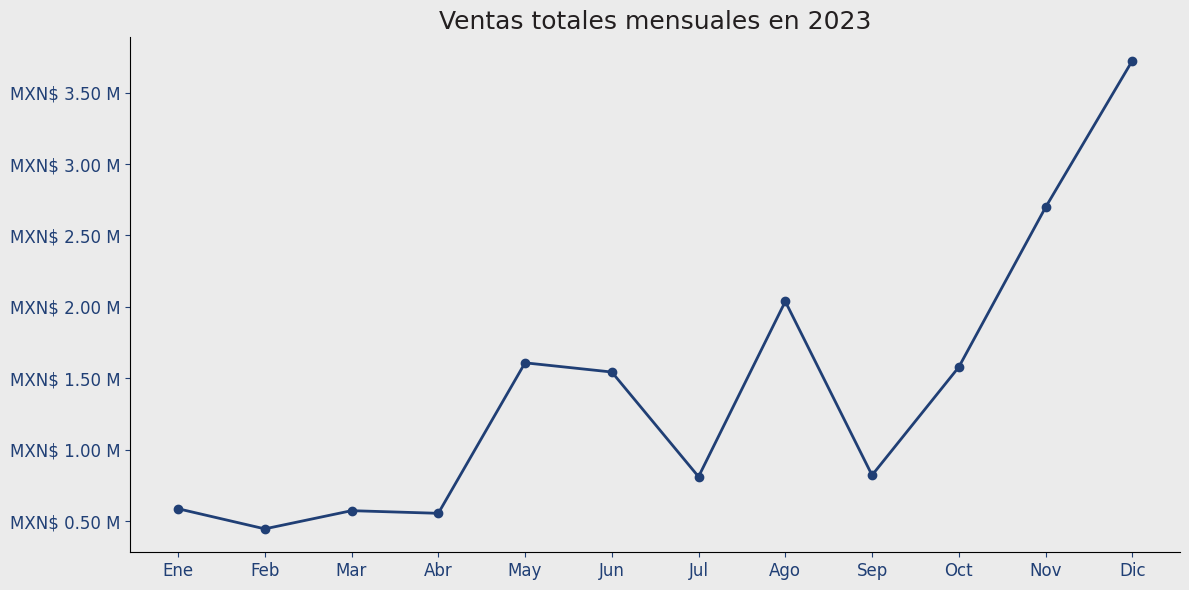

In [463]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Diccionario de meses ordenados (en ingl√©s)
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# 2. Agregar columna "mes" como nombre completo del mes
df['mes'] = df['fecha'].dt.strftime('%B')

# 3. Agrupar ventas por mes en orden correcto
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# 4. Reemplazar √≠ndice en ingl√©s por abreviaturas en espa√±ol
ventas_mensuales.index = ventas_mensuales.index.map(meses)

# 5. Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# 6. Graficar l√≠nea de ventas
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# 7. T√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# 8. Personalizaci√≥n de ejes
ax.set_xlabel('')
ax.set_ylabel('')

ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Formato personalizado del eje Y: "MXN$ 1.23 M"
formatter = FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
ax.yaxis.set_major_formatter(formatter)

# 9. Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 10. Mostrar gr√°fico
plt.tight_layout()
plt.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

¬°Genial! Ahora que nuestro gr√°fico ya tiene la identidad visual, vamos a a√±adir algunos elementos visuales adicionales.

Dibuja 4 c√≠rculos de radio 200, transparentes con el borde en color ROJO_1 y con el centro en las coordenadas del 5¬∫, 8¬∫, 11¬∫ y 12¬∫ puntos, respectivamente. A la izquierda de cada c√≠rculo enumera del 1 al 4.


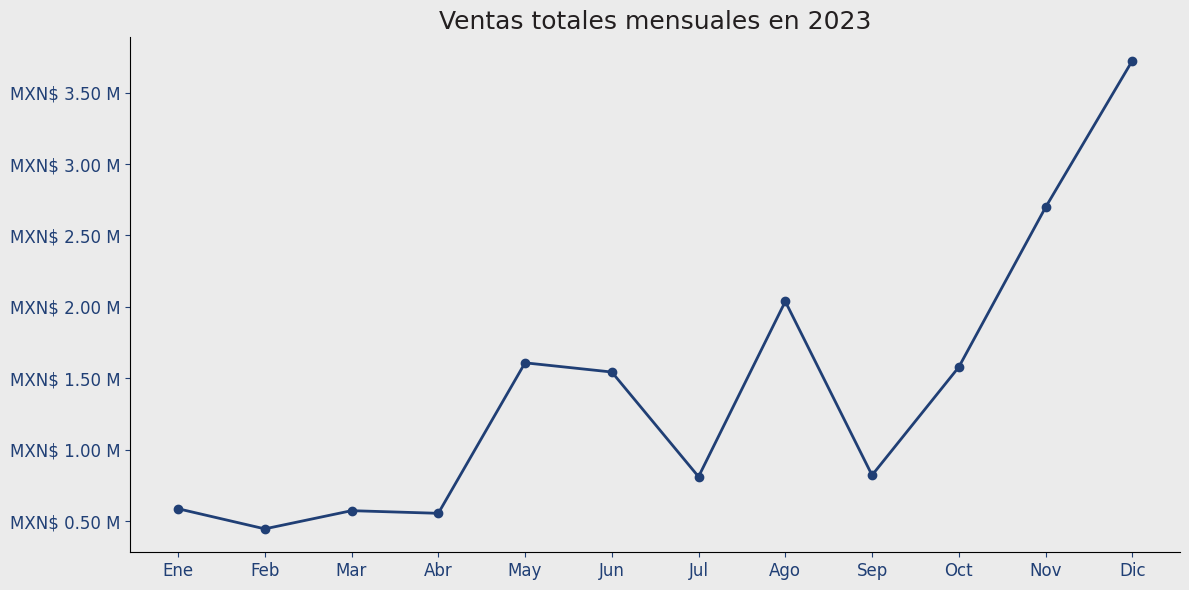

In [464]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Diccionario de meses ordenados (en ingl√©s)
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# 2. Agregar columna "mes" como nombre completo del mes
df['mes'] = df['fecha'].dt.strftime('%B')

# 3. Agrupar ventas por mes en orden correcto
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# 4. Reemplazar √≠ndice en ingl√©s por abreviaturas en espa√±ol
ventas_mensuales.index = ventas_mensuales.index.map(meses)

# 5. Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# 6. Graficar l√≠nea de ventas
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# 7. T√≠tulo
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# 8. Personalizaci√≥n de ejes
ax.set_xlabel('')
ax.set_ylabel('')

ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Formato personalizado del eje Y: "MXN$ 1.23 M"
formatter = FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
ax.yaxis.set_major_formatter(formatter)

# 9. Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 10. Mostrar gr√°fico
plt.tight_layout()
plt.show()


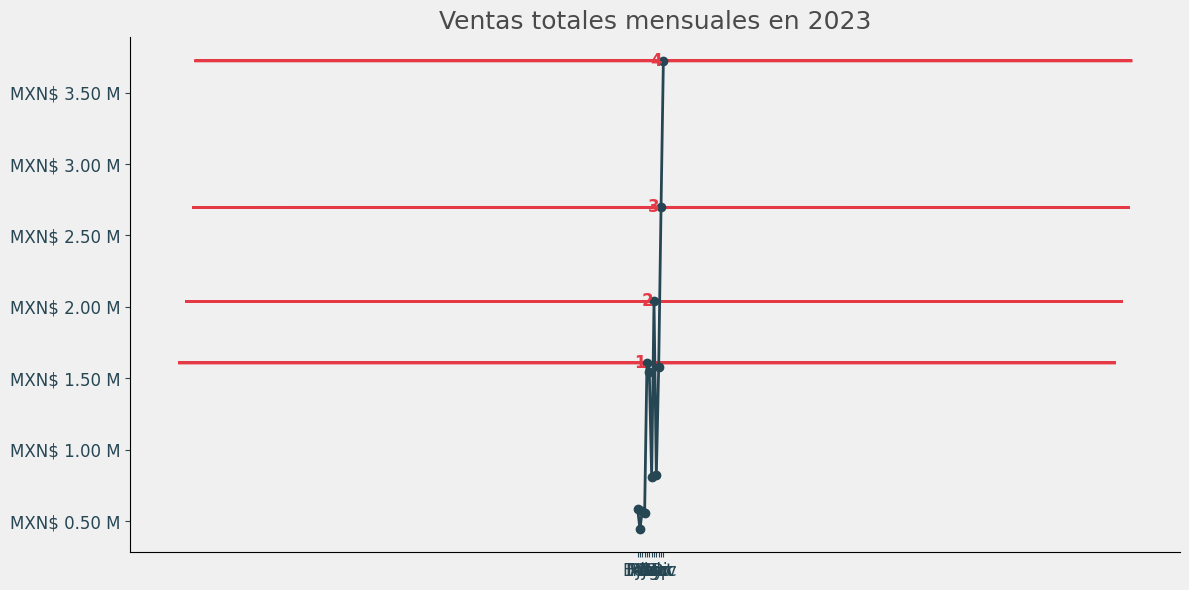

In [465]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Circle

# 1. Diccionario de meses ordenados
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar',
    'April': 'Abr', 'May': 'May', 'June': 'Jun',
    'July': 'Jul', 'August': 'Ago', 'September': 'Sep',
    'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}

# 2. Agregar columna de nombre del mes
df['mes'] = df['fecha'].dt.strftime('%B')

# 3. Agrupar por mes y reindexar
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
ventas_mensuales.index = ventas_mensuales.index.map(meses)

# 4. Colores
GRIS_1 = '#f0f0f0'
GRIS_5 = '#4a4a4a'
AZUL_1 = '#264653'
ROJO_1 = '#e63946'

# 5. Crear gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# 6. L√≠nea de ventas
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# 7. T√≠tulo y ejes
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

formatter = FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
ax.yaxis.set_major_formatter(formatter)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 8. Coordenadas de los puntos para resaltar (5¬∫, 8¬∫, 11¬∫, 12¬∫)
indices_a_resaltar = [4, 7, 10, 11]
valores_x = list(ventas_mensuales.index)
valores_y = ventas_mensuales.values

for i, idx in enumerate(indices_a_resaltar):
    # Coordenadas
    x = idx
    y = valores_y[idx]

    # Dibujo del c√≠rculo
    circle = Circle(
        (x, y),
        radius=200,
        edgecolor=ROJO_1,
        facecolor='none',
        linewidth=2
    )
    ax.add_patch(circle)

    # N√∫mero al lado izquierdo del c√≠rculo
    ax.text(
        x - 0.5,
        y,
        str(i + 1),
        fontsize=12,
        color=ROJO_1,
        va='center',
        ha='right',
        fontweight='bold'
    )

# 9. Mostrar gr√°fico
plt.tight_layout()
plt.show()


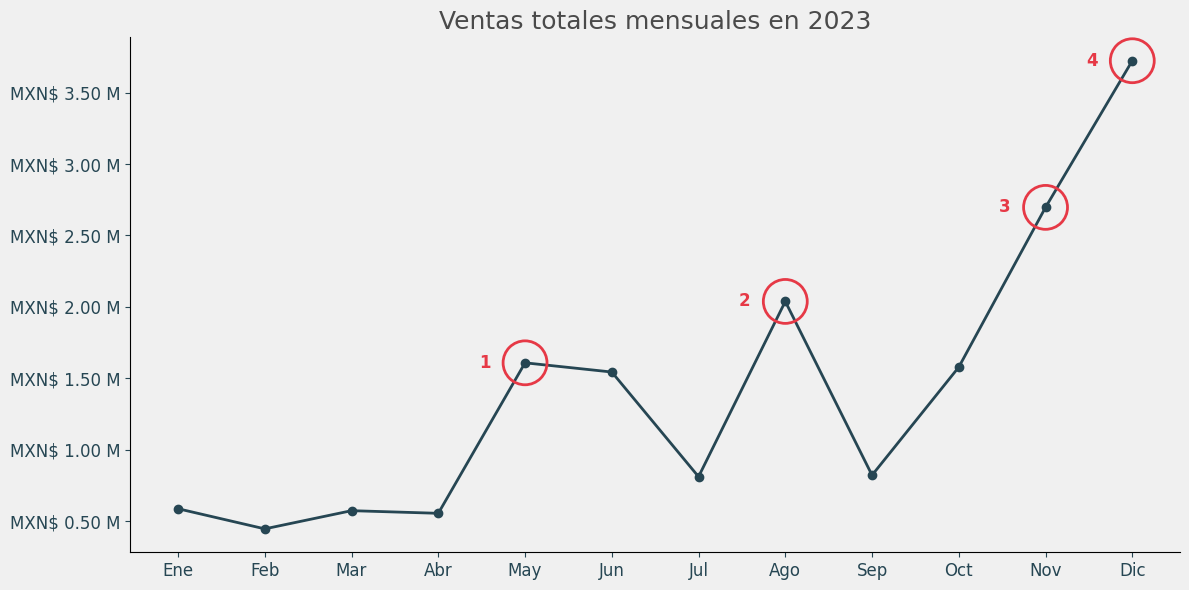

In [466]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1. Diccionario de meses ordenados
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar',
    'April': 'Abr', 'May': 'May', 'June': 'Jun',
    'July': 'Jul', 'August': 'Ago', 'September': 'Sep',
    'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}

# 2. Preparar DataFrame
df['mes'] = df['fecha'].dt.strftime('%B')
ventas_mensuales = df.groupby('mes')['facturacion'].sum().reindex(meses.keys())
ventas_mensuales.index = ventas_mensuales.index.map(meses)

# 3. Colores Zoop
GRIS_1 = '#f0f0f0'
GRIS_5 = '#4a4a4a'
AZUL_1 = '#264653'
ROJO_1 = '#e63946'

# 4. Crear gr√°fico
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# 5. L√≠nea de ventas
ax.plot(
    ventas_mensuales.index,
    ventas_mensuales.values,
    marker='o',
    color=AZUL_1,
    linewidth=2
)

# 6. Est√©tica general
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
formatter = FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
ax.yaxis.set_major_formatter(formatter)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7. Coordenadas de los puntos por nombre del mes
meses_destacados = ['May', 'Ago', 'Nov', 'Dic']  # 5¬∫, 8¬∫, 11¬∫, 12¬∫ meses en espa√±ol

# for i, mes in enumerate(meses_destacados):
#     x = mes
#     y = ventas_mensuales.loc[mes]

#     # C√≠rculo simulado con scatter
#     ax.scatter(
#         x,
#         y,
#         s=1000,
#         facecolors='none',
#         edgecolors=ROJO_1,
#         linewidths=2,
#         zorder=5  # para que se superponga
#     )

#     # N√∫mero a la izquierda
#     ax.text(
#         x,
#         y,
#         str(i + 1),
#         color=ROJO_1,
#         fontsize=12,
#         ha='right',
#         va='center',
#         fontweight='bold',
#         x=-0.4 + list(ventas_mensuales.index).index(x)  # ajustar posici√≥n
#     )

for i, mes in enumerate(meses_destacados):
    x_idx = list(ventas_mensuales.index).index(mes)
    x = ventas_mensuales.index[x_idx]
    y = ventas_mensuales.loc[x]

    # C√≠rculo con scatter
    ax.scatter(
        x,
        y,
        s=1000,
        facecolors='none',
        edgecolors=ROJO_1,
        linewidths=2,
        zorder=5
    )

    # N√∫mero a la izquierda del c√≠rculo
    ax.text(
        x_idx - 0.4,  # posici√≥n X desplazada a la izquierda
        y,
        str(i + 1),
        color=ROJO_1,
        fontsize=12,
        ha='right',
        va='center',
        fontweight='bold'
    )

# 8. Mostrar gr√°fico
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos a√±adido 4 c√≠rculos que representan los puntos con mayor volumen de ventas de Zoop en 2023. Podemos plantear algunas hip√≥tesis:

1. En mayo, tenemos una de las fechas m√°s relevantes en ventas: el D√≠a de las Madres, lo que puede justificar el aumento en las ventas de Zoop.
2. En agosto, hay una situaci√≥n que pueden explicar el crecimiento: la vuelta a clases en el segundo semestre en algunos estados de Mexico.
3. En noviembre, destaca la Black Friday, uno de los principales per√≠odos de alta en las ventas, considerado de gran relevancia para el comercio minorista.
4. En diciembre, tenemos  las festividades de A√±o Nuevo, consideradas el per√≠odo de mayores ventas no solo para Zoop, sino para el comercio minorista en general.

La recomendaci√≥n es investigar m√°s a fondo los datos y llegar a tus propias conclusiones.


Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, vamos a hacer una peque√±a modificaci√≥n en los 2 primeros, convirti√©ndolos en funciones, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n


# **Clase 5 - Finalizando el proyecto**

Antes de ajustar los √∫ltimos 5 visuales de nuestro proyecto, haremos una peque√±a modificaci√≥n en los 2 primeros pas√°ndolos a funci√≥n, lo que facilitar√° m√°s adelante cuando realicemos la exportaci√≥n de los visuales.


### **Gr√°fico 1 - M√©todos de pago m√°s utilizados en 2023:**

In [467]:
 def metodo_pago():
  # 3. Crear figura con Plotly
  fig = go.Figure()

  # 4. Agregar barras
  fig.add_trace(go.Bar(
      x=metodos_de_pago['metodo_pago'],
      y=metodos_de_pago['cantidad'],
      marker_color=ROJO_1,
      text=metodos_de_pago['cantidad'],
      textposition='outside',
      textfont=dict(size=12, color=AZUL_1)
  ))

  # 5. Personalizar dise√±o general
  fig.update_layout(
      title='M√©todos de pago m√°s utilizados en 2023',
      title_font_size=18,
      title_font_color=GRIS_5,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      height=600,
      width=1000,
      showlegend=False,
      margin=dict(l=40, r=40, t=80, b=40),
      xaxis=dict(
          title='',
          tickfont=dict(size=20, color=AZUL_1),
          showline=False,
          showgrid=False
      ),
      yaxis=dict(
          title='',
          showticklabels=False,
          showline=False,
          showgrid=False
      )
  )

  # 6. Mostrar el gr√°fico
  return fig

In [468]:
metodo_pago().show()

In [469]:
def ventas_totales():
  fig, ax = plt.subplots(figsize=(12, 6))
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)
    # 5. L√≠nea de ventas
  ax.plot(
      ventas_mensuales.index,
      ventas_mensuales.values,
      marker='o',
      color=AZUL_1,
      linewidth=2
  )

  # 6. Est√©tica general
  ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
  formatter = FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
  ax.yaxis.set_major_formatter(formatter)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  # 7. Coordenadas de los puntos por nombre del mes
  meses_destacados = ['May', 'Ago', 'Nov', 'Dic']  # 5¬∫, 8¬∫, 11¬∫, 12¬∫ meses en espa√±ol

  for i, mes in enumerate(meses_destacados):
      x_idx = list(ventas_mensuales.index).index(mes)
      x = ventas_mensuales.index[x_idx]
      y = ventas_mensuales.loc[x]

      # C√≠rculo con scatter
      ax.scatter(
          x,
          y,
          s=1000,
          facecolors='none',
          edgecolors=ROJO_1,
          linewidths=2,
          zorder=5
      )

      # N√∫mero a la izquierda del c√≠rculo
      ax.text(
          x_idx - 0.4,  # posici√≥n X desplazada a la izquierda
          y,
          str(i + 1),
          color=ROJO_1,
          fontsize=12,
          ha='right',
          va='center',
          fontweight='bold'
      )

  # 8. Mostrar gr√°fico
  plt.tight_layout()
  return plt

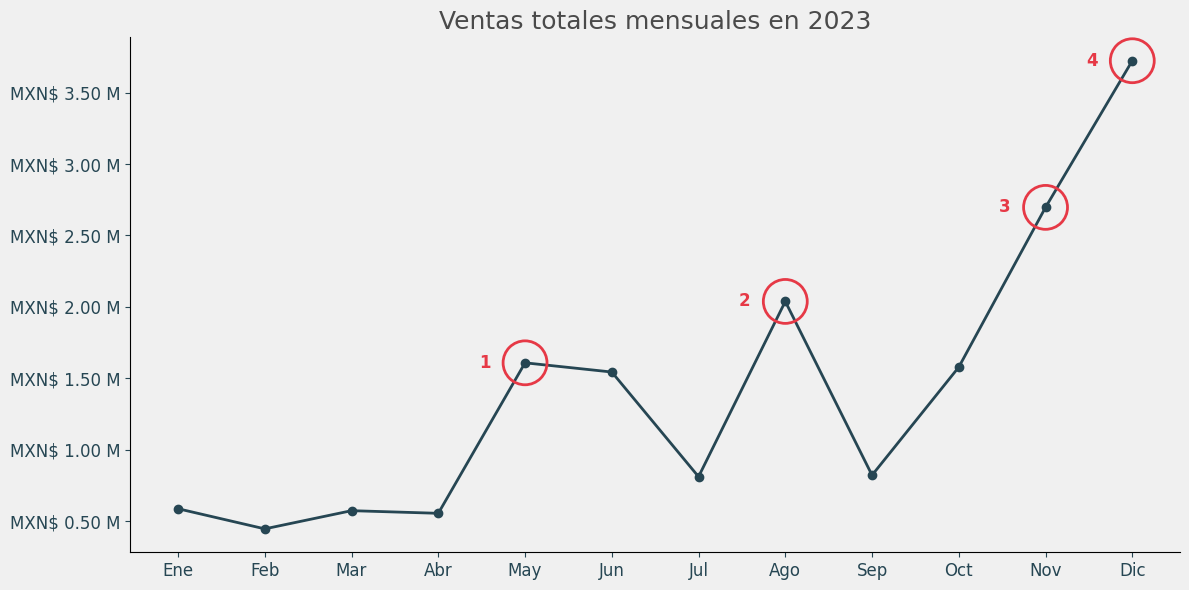

In [470]:
ventas_totales().show()

### **Gr√°fico 2 - Total de ventas mensuales en 2023:**

In [471]:
def facturacion_categoria():
  # 4. Crear gr√°fico de barras horizontales
  fig = px.bar(
      facturacion_por_categoria,
      x='facturacion',
      y='categoria',
      orientation='h',
      text='facturacion',
      title='Facturaci√≥n por categor√≠a de producto',
      labels={'categoria': 'Categor√≠a', 'facturacion': 'Facturaci√≥n ($)'},
      color='categoria'  # Colorear por categor√≠a
  )

  # 5. Ajustes de presentaci√≥n
  fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
  fig.update_layout(showlegend=False)
  return fig

In [472]:
facturacion_categoria().show()

Ahora que guardamos los 2 primeros gr√°ficos en funci√≥n, vamos a modificar uno m√°s, **Facturaci√≥n por categor√≠a de producto en 2023**, utilizando las t√©cnicas de storytelling que ya hemos aprendido.


### **Gr√°fico 3 - Facturaci√≥n por categor√≠a de producto en 2023:**


Vamos a continuar con los gr√°ficos generados a lo largo de las clases, partiendo ahora del gr√°fico de facturaci√≥n por categor√≠a de producto aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


In [473]:
# 3. Agrupar por trimestre y m√©todo de pago, sumando la facturaci√≥n
ventas_trimestrales = df.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().reset_index()

In [474]:
def ventas_trimestre():
  # 4. Crear gr√°fico de barras apiladas
  fig = px.bar(
      ventas_trimestrales,
      x='trimestre',
      y='facturacion',
      color='metodo_pago',
      title='Ventas por trimestre seg√∫n m√©todo de pago',
      labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
      text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
  )

  # 5. Ajustes de presentaci√≥n
  fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

  # Mostrar gr√°fico
  return fig

In [475]:
ventas_trimestre().show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

¬øVamos a proceder con otro gr√°fico? Ahora, vamos refinar el gr√°fico de facturaci√≥n por categor√≠a. Recuerda que este gr√°fico fue de barras horizontales.

El script original del gr√°fico es el siguiente:

```python

# 4. Crear gr√°fico de barras apiladas
fig = px.bar(
    ventas_trimestrales,
    x='trimestre',
    y='facturacion',
    color='metodo_pago',
    title='Ventas por trimestre seg√∫n m√©todo de pago',
    labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
    text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
)

# 5. Ajustes de presentaci√≥n
fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

# Mostrar gr√°fico
return fig
```
Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, las barras en el color AQUA_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Facturaci√≥n por categor√≠a de producto en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben ser suprimidas al igual que los labels de los ejes x y y (xlabel y ylabel), y las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1. Todas las bordes del gr√°fico deben ser suprimidas.

Adem√°s, es necesario mostrar el total de la facturaci√≥n de cada categor√≠a al lado derecho de cada barra, con el texto tambi√©n en color AZUL_1 y tama√±o 12.

Tambi√©n vamos a agregar un texto dentro del √°rea del gr√°fico. Para ello, divide el valor de la 1¬™ barra entre la suma de todas las barras y convi√©rtelo en un porcentaje, almacen√°ndolo en la variable "porcentaje".

Ahora, en la posici√≥n x = 0.4e7 y y = 5, agrega el siguiente texto con tama√±o 12 y color AZUL_3: `f"$\\bf{porcentaje:.2f}$% de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.\nEsto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as\npresentes en el portafolio de Zoop."`.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [476]:
def facturacion_categoria():
  # 2. Calcular porcentaje de la primera categor√≠a (m√°s baja) respecto al total
  porcentaje = (facturacion_por_categoria['facturacion'].iloc[-1] /
                facturacion_por_categoria['facturacion'].sum()) * 100

  # 3. Crear gr√°fico de barras horizontales en Plotly
  fig = px.bar(
      facturacion_por_categoria,
      x='facturacion',
      y='categoria',
      orientation='h',
      text='facturacion',
      labels={'categoria': '', 'facturacion': ''},
      title='Facturaci√≥n por categor√≠a de producto en 2023',
      color_discrete_sequence=[AQUA_1]
  )

  # 4. Actualizar trazas (etiquetas al final de las barras)
  fig.update_traces(
      texttemplate='%{text:.2f}',
      textposition='outside',
      marker_color=AQUA_1
  )

  # 5. Ajustes de layout
  fig.update_layout(
      height=600,
      width=1000,
      plot_bgcolor=GRIS_1,
      paper_bgcolor=GRIS_1,
      showlegend=False,
      title=dict(
          font=dict(size=18, color=GRIS_5),
          x=0.5
      ),
      margin=dict(l=10, r=10, t=60, b=40),
      xaxis=dict(showticklabels=False, showgrid=False, zeroline=False),
      yaxis=dict(
          tickfont=dict(size=12, color=AZUL_1),
          showgrid=False,
          zeroline=False
      )
  )

  # 6. Texto adicional dentro del √°rea del gr√°fico
  texto = (f"<b>{porcentaje:.2f}%</b> de las ventas corresponden √∫nicamente a las ventas de Electr√≥nica.<br>"
          "Esto equivale a casi el doble en relaci√≥n con todas las dem√°s categor√≠as<br>"
          "presentes en el portafolio de Zoop.")

  fig.add_annotation(
      x=0.5e7,
      y=5,
      text=texto,
      showarrow=False,
      font=dict(size=12, color=AZUL_3),
      align='left'
  )

  # 7. Mostrar gr√°fico
  return fig

In [477]:
facturacion_categoria().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hicimos con un solo prompt la inserci√≥n de las etiquetas, la modificaci√≥n de los colores y a√±adimos un texto explicativo. Con la secuencia de explicaciones para ChatGPT, este reconoce algunos patrones en la construcci√≥n y genera parte del c√≥digo incluso sin m√°s detalles.


## **5.2 - Ajustando los visuales de composici√≥n**

---


Ya hemos llegado a pr√°cticamente la mitad de los gr√°ficos refinados. Ahora, en este tema, ajustaremos 2 m√°s aplicando las t√©cnicas de storytelling que aprendimos aqu√≠ en el curso mediante el uso de la IA.


### **Gr√°fico 4 - Ventas por trimestre y m√©todo de pago:**

In [478]:
# 4. Crear gr√°fico de barras apiladas
fig = px.bar(
    ventas_trimestrales,
    x='trimestre',
    y='facturacion',
    color='metodo_pago',
    title='Ventas por trimestre seg√∫n m√©todo de pago',
    labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
    text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
)

# 5. Ajustes de presentaci√≥n
fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

# Mostrar gr√°fico
fig.show()

> #### <strong><font color="7b71ff" size=6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de Ventas por Trimestre y M√©todo de Pago que producimos anteriormente. Vamos a refinarlo usando las siguientes directrices.

Recuerda que el script original del gr√°fico es el siguiente:
```python

  # 4. Crear gr√°fico de barras apiladas
  fig = px.bar(
      ventas_trimestrales,
      x='trimestre',
      y='facturacion',
      color='metodo_pago',
      title='Ventas por trimestre seg√∫n m√©todo de pago',
      labels={'trimestre': 'Trimestre', 'facturacion': 'Facturaci√≥n ($)', 'metodo_pago': 'M√©todo de Pago'},
      text_auto='.2s'  # Muestra los valores sobre las barras (abreviado)
  )

  # 5. Ajustes de presentaci√≥n
  fig.update_layout(barmode='stack', xaxis=dict(categoryorder='category ascending'))

  # Mostrar gr√°fico
  fig.show()

```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1 y el tama√±o de la figura debe ser de (10, 6). La secuencia de colores de las columnas apiladas (palette) es [BLANCO, GRIS_3, GRIS_1, GRIS_3].

El t√≠tulo de la figura es "Ventas por Trimestre y M√©todo de Pago en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar a 0 grados y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben estar en el formato f"MXN$ valor M" sin decimales y las etiquetas de los ejes x e y (xlabel e ylabel) deben ser suprimidas. Todos los bordes del gr√°fico deben ser suprimidos(['top','bottom','left','right]).

Tambi√©n agrega una cuadr√≠cula punteada en y.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [479]:
def ventas_trimestre_2():
  # 3. Crear gr√°fico con Plotly Express
  fig = px.bar(
      ventas_trimestrales,
      x='trimestre',
      y='facturacion',
      color='metodo_pago',
      title='Ventas por Trimestre y M√©todo de Pago en 2023',
      labels={'trimestre': '', 'facturacion': '', 'metodo_pago': 'M√©todo de Pago'},
      text_auto='.2s',
      color_discrete_sequence=colores
  )

  # 4. Ajustar Layout general
  fig.update_layout(
      height=600,
      width=1000,
      plot_bgcolor='#f0f0f0',
      paper_bgcolor='#f0f0f0',
      barmode='stack',
      xaxis=dict(
          categoryorder='category ascending',
          tickangle=0,
          tickfont=dict(size=12, color='#264653'),
          showline=False,
          showticklabels=True,
          title=''
      ),
      yaxis=dict(
          tickformat=',.0s',
          tickprefix='MXN$ ',
          tickfont=dict(size=12, color='#264653'),
          gridcolor='gray',
          gridwidth=0.5,
          griddash='dot',
          zeroline=False,
          title=''
      ),
      legend_title_text='',
      title=dict(
          text='Ventas por Trimestre y M√©todo de Pago en 2023',
          font=dict(size=18, color='#4a4a4a'),
          x=0.5
      ),
      margin=dict(t=60, l=20, r=20, b=40)
  )

  # 5. Ocultar bordes (top, bottom, left, right)
  fig.update_xaxes(showline=False, showgrid=False, zeroline=False)
  fig.update_yaxes(showline=False)

  # 6. Mostrar gr√°fico
  return fig

In [480]:
ventas_trimestre_2().show()


<font color="7b71ff" size=4> Comentarios: </font>

---

Ajustamos el gr√°fico de barras apiladas representando con colores m√°s suaves los valores de los m√©todos de pago. Podemos notar cosas interesantes en este gr√°fico, como: el 2¬∫ y 4¬∫ trimestre siendo los momentos en que Zoop factura m√°s con ventas, y tambi√©n el aumento en los pagos de las compras realizadas por los clientes mediante tarjeta de cr√©dito.


### **Gr√°fico 5 - Clientes participantes del programa de cashback:**

Ahora ha llegado el momento del gr√°fico de sectores. Ya est√° bien encaminado, pero necesitamos realizar algunos ajustes.


In [481]:
# 2. Crear gr√°fico de dona (pie con agujero central)
fig = px.pie(
    cashback_resumen,
    names='participa_cashback',
    values='cantidad',
    # hole=0.4,  # Esto convierte el gr√°fico en una dona
    title='Proporci√≥n de usuarios que participan en el programa de cashback'
)

# 3. Mostrar el porcentaje dentro de cada secci√≥n
fig.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(cashback_resumen))])

# 4. Mostrar el gr√°fico
fig.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora, vamos a refinar el gr√°fico de dona que produjimos para la proporci√≥n de usuarios que se adhieren al programa de cashback.

Recuerda que el script original del gr√°fico es el siguiente:

```python
# 2. Crear gr√°fico de dona (pie con agujero central)
fig = px.pie(
    cashback_resumen,
    names='participa_cashback',
    values='cantidad',
    # hole=0.4,  # Esto convierte el gr√°fico en una dona
    title='Proporci√≥n de usuarios que participan en el programa de cashback'
)

# 3. Mostrar el porcentaje dentro de cada secci√≥n
fig.update_traces(textinfo='percent+label', pull=[0.1 if i == 0 else 0 for i in range(len(cashback_resumen))])

# 4. Mostrar el gr√°fico
fig.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de la porci√≥n de valor "No" igual a GRIS_3, el color de la porci√≥n de valor "S√≠" igual a AZUL_1 y el tama√±o de la figura debe ser de (6, 6).

El t√≠tulo de la figura es "¬øParticipan en el programa de cashback?" con un tama√±o de 18 y su color GRIS_5.

Las etiquetas de las porciones deben tener el mismo color que las porciones y un tama√±o de 12, y los porcentajes deben estar en color BLANCO, tambi√©n con un tama√±o de 12.

La propiedad de ancho de la dona (`wedgeprops`) debe ser de 0.4, la posici√≥n de los porcentajes dentro de la porci√≥n (`pctdistance`) debe ser de 0.8, el √°ngulo de inicio debe ser de 180 (`startangle`), y sin explosi√≥n de porciones.

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [482]:
def cashback_grafico():

  # 1. Preparar datos
  labels = cashback_resumen['participa_cashback']
  values = cashback_resumen['cantidad']

  # 2. Asignar colores por valor "S√≠"/"No"
  colors = [AZUL_1 if label == 'S√≠' else GRIS_3 for label in labels]

  # 3. Crear gr√°fico de dona personalizado
  fig = go.Figure(data=[go.Pie(
      labels=labels,
      values=values,
      hole=0.4,
      marker=dict(colors=colors),
      textinfo='label+percent',
      textposition='inside',
      insidetextfont=dict(size=12, color=BLANCO),
      textfont=dict(size=12),
      sort=False,
      direction='clockwise',
      rotation=180,  # startangle
      showlegend=False
  )])

  # 4. Ajustar dise√±o del gr√°fico
  fig.update_layout(
      height=600,
      width=600,
      title={
          'text': '¬øParticipan en el programa de cashback?',
          'x': 0.5,
          'font': dict(size=18, color=GRIS_5)
      },
      paper_bgcolor=GRIS_1,
      plot_bgcolor=GRIS_1
  )

  # 5. Mostrar gr√°fico
  return fig

In [483]:
cashback_grafico().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Hemos modificado otro gr√°fico, ahora el de dona, para representar la proporci√≥n de nuestros(as) clientes. Dimos mayor destaque al "S√≠", utilizando el color como recurso de punto focal.


## **5.3 - Ajustando los visuales de distribuci√≥n**

---


Ahora vamos con los √∫ltimos 2 gr√°ficos antes de la exportaci√≥n de los visuales. Vamos a aplicar m√°s t√©cnicas de storytelling que aprendimos mediante el uso de la IA.


### **Gr√°fico 6 - Evaluaciones de los productos:**


Agora vamos para a distribui√ß√£o das avalia√ß√µes dos produtos em que criamos um histograma. Vamos adicionar mais um novo elemento visual e realizar alguns ajustes.

In [484]:
# 2. Crear gr√°fico de barras
fig = px.bar(
    notas,
    x='nota',
    y='cantidad',
    text='cantidad',
    title='Distribuci√≥n de calificaciones de los usuarios',
    labels={'nota': 'Calificaci√≥n', 'cantidad': 'Cantidad de usuarios'},
    color='nota'  # opcional: colorea por nota para m√°s contraste
)

# 3. Ajustes est√©ticos
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

# 4. Mostrar gr√°fico
fig.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos con el gr√°fico de la Distribuci√≥n de las Evaluaciones de Compra que produjimos anteriormente. Vamos a refinarlo usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
# 2. Crear gr√°fico de barras
fig = px.bar(
    notas,
    x='nota',
    y='cantidad',
    text='cantidad',
    title='Distribuci√≥n de calificaciones de los usuarios',
    labels={'nota': 'Calificaci√≥n', 'cantidad': 'Cantidad de usuarios'},
    color='nota'  # opcional: colorea por nota para m√°s contraste
)

# 3. Ajustes est√©ticos
fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)

# 4. Mostrar gr√°fico
fig.show()
```

Nuestro gr√°fico necesita seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, el color de las columnas en ROJO_1 y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de las evaluaciones de las compras en 2023" con tama√±o 18 y su color GRIS_5.

Las etiquetas del eje x (xticks) deben estar en el rango de 0 a 10 con 11 bins y tener tama√±o 12 con el color AZUL_1. Las etiquetas del eje y (yticks) deben tener tama√±o 12 con el color AZUL_1 y las etiquetas de los ejes x e y (xlabel e ylabel) tambi√©n deben tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos (['top', 'bottom', 'left', 'right']).

El grid del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a a√±adir una caja de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico. El texto de la anotaci√≥n es

```python
f"Promedio de calificaciones = {df['nota'].mean().round(2)}\n Calificaci√≥n m√°s com√∫n = {df['nota'].value_counts().idxmax()}\n Frecuencia m√°s com√∫n = {df['nota'].value_counts().max()}"
```

en color AZUL_1. A√±ade la caja de anotaci√≥n con el texto en la posici√≥n xytext=(2, 1800) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(8.7, 2250).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [485]:
def calificaciones_grafico():
  # 2. Crear gr√°fico de barras refinado
  fig, ax = plt.subplots(figsize=(10, 6))
  bars = ax.bar(
      notas['nota'],
      notas['cantidad'],
      color=ROJO_1
  )

  # 3. Fondo ejes y figura
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)

  # 4. T√≠tulo
  ax.set_title('Distribuci√≥n de las evaluaciones de las compras en 2023',
              fontsize=18, color=GRIS_5)

  # 5. Ejes
  ax.set_xticks(range(0, 11, 1))
  ax.set_xticklabels(range(0, 11, 1), fontsize=12, color=AZUL_1)
  ax.set_yticklabels(ax.get_yticks(), fontsize=12, color=AZUL_1)
  ax.set_xlabel('Calificaci√≥n', fontsize=12, color=AZUL_1)
  ax.set_ylabel('Cantidad de usuarios', fontsize=12, color=AZUL_1)

  # 6. Borrar bordes del gr√°fico
  for spine in ['top', 'right', 'left', 'bottom']:
      ax.spines[spine].set_visible(False)

  # 7. Rejilla detr√°s de las barras
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='--', alpha=0.5)

  # 8. A√±adir texto sobre cada barra
  for bar in bars:
      height = bar.get_height()
      ax.annotate(f'{height}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 5),
                  textcoords='offset points',
                  ha='center',
                  fontsize=10,
                  color=AZUL_1)

  # 9. Datos para anotaci√≥n
  promedio = df['nota'].mean().round(2)
  mas_comun = df['nota'].value_counts().idxmax()
  frecuencia = df['nota'].value_counts().max()
  texto = (f"Promedio de calificaciones = {promedio}\n"
          f"Calificaci√≥n m√°s com√∫n = {mas_comun}\n"
          f"Frecuencia m√°s com√∫n = {frecuencia}")

  # 10. Anotaci√≥n con caja
  ax.annotate(
      texto,
      xy=(8.7, 2250),
      xytext=(2, 1800),
      fontsize=10,
      color=AZUL_1,
      arrowprops=dict(arrowstyle='->', color=AZUL_1),
      bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3, lw=1)
  )

  # 11. Mostrar gr√°fico
  plt.tight_layout()
  return plt

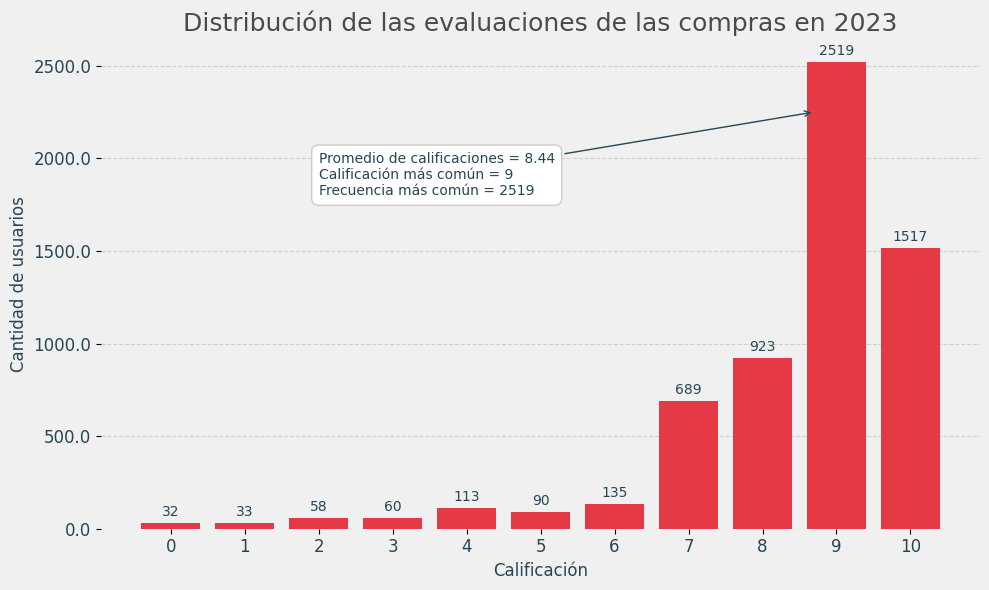

In [486]:
calificaciones_grafico().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

¬°Una novedad m√°s en nuestro gr√°fico! A√±adimos la funci√≥n de caja de anotaciones, que es muy √∫til para proporcionar informaci√≥n sobre los datos. Con ella es posible utilizar flechas como indicadores para destacar detalles.


### **Gr√°fico 7 - Distribuci√≥n del p√∫blico por edad y sexo biol√≥gico:**


Ahora vamos con nuestra √∫ltima visualizaci√≥n.


In [487]:
fig = px.violin(
    df,
    y='edad',
    x='sexo_biologico',
    color='sexo_biologico',
    box=True,  # Muestra caja dentro del viol√≠n
    points='all',  # Muestra puntos individuales
    title='Distribuci√≥n de edad por sexo biol√≥gico',
    labels={'edad': 'Edad', 'sexo_biologico': 'Sexo biol√≥gico'}
)

fig.show()

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Ahora vamos al gr√°fico de boxplot de la Distribuci√≥n de la Edad por Sexo Biol√≥gico que produjimos anteriormente. Vamos a refinado usando las siguientes orientaciones.

El script original que genera el gr√°fico es el siguiente:

```python
fig = px.violin(
    df,
    y='edad',
    x='sexo_biologico',
    color='sexo_biologico',
    box=True,  # Muestra caja dentro del viol√≠n
    points='all',  # Muestra puntos individuales
    title='Distribuci√≥n de edad por sexo biol√≥gico',
    labels={'edad': 'Edad', 'sexo_biologico': 'Sexo biol√≥gico'}
)

fig.show()
```

Nuestro gr√°fico debe seguir la identidad visual de Zoop, con el fondo de la figura y del gr√°fico en el color GRIS_1, y el tama√±o de la figura debe ser de (10, 6).

El t√≠tulo de la figura es "Distribuci√≥n de la Edad por Sexo Biol√≥gico de los  clientes" con tama√±o 18 y su color GRIS_5.

La columna 'sexo_biologico' est√° representada en el eje x y la 'edad' en el eje y. La paleta de colores para los valores de x es [AZUL_1, AQUA_1].

La etiqueta del eje x (xlabel) debe ser suprimida. Los r√≥tulos del eje x y y (xticks y yticks) deben tener tama√±o 12 con el color AZUL_1 y la etiqueta del eje y (ylabel) tambi√©n debe tener tama√±o 12 con el color AZUL_1. Todos los bordes del gr√°fico deben ser suprimidos y la cuadr√≠cula del eje y debe estar detr√°s del gr√°fico (`ax.set_axisbelow(True)`).

Vamos a agregar dos cajas de anotaci√≥n (`ax.annotate()`) con el fondo en color BLANCO y el borde en color GRIS_3 dentro del √°rea del gr√°fico.

El texto de la primera anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[1]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[1]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[1]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[1]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[1]"
```

Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(-0.4, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(-0.1, 45).

El texto de la segunda anotaci√≥n en color AZUL_1 es

```python
f"M√≠nimo = df.groupby("sexo_biologico")["edad"].min()[0]\n 1¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.25)[0]\n 2¬∫ quartil = df.groupby("sexo_biologico")["edad"].median()[0]\n 3¬∫ quartil = df.groupby("sexo_biologico")["edad"].quantile(.75)[0]\n M√°ximo = df.groupby("sexo_biologico")["edad"].max()[0]"
```


Agrega la caja de anotaci√≥n con el texto en la posici√≥n xytext=(0.6, 50) y coloca una flecha, en color AZUL_1, saliendo de la caja hasta la posici√≥n xy=(0.9, 45).

Utiliza las bibliotecas de visualizaci√≥n de datos de Python para crear esta visualizaci√≥n.


In [488]:
import matplotlib.pyplot as plt
import seaborn as sns

In [489]:
def distribucion_sexo():
  # 1. Paleta para los valores de sexo_biol√≥gico
  palette = {
      df['sexo_biologico'].unique()[0]: AZUL_1,
      df['sexo_biologico'].unique()[1]: AQUA_1
  }
  # 2. Crear gr√°fico boxplot
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.boxplot(
      data=df,
      x='sexo_biologico',
      y='edad',
      palette=palette,
      ax=ax
  )

  # 3. Fondo y rejilla
  fig.patch.set_facecolor(GRIS_1)
  ax.set_facecolor(GRIS_1)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, linestyle='--', alpha=0.5)

  # 4. T√≠tulo y etiquetas
  ax.set_title('Distribuci√≥n de la Edad por Sexo Biol√≥gico de los clientes', fontsize=18, color=GRIS_5)
  ax.set_xlabel('')
  ax.set_ylabel('Edad', fontsize=12, color=AZUL_1)
  ax.tick_params(axis='both', labelsize=12, colors=AZUL_1)

  # 5. Ocultar bordes
  for spine in ['top', 'right', 'left', 'bottom']:
      ax.spines[spine].set_visible(False)

  # 6. C√°lculo de estad√≠sticas para anotaciones
  stats = df.groupby("sexo_biologico")["edad"].describe(percentiles=[.25, .5, .75])

  texto1 = (
      f"M√≠nimo = {int(stats.loc[stats.index[1], 'min'])}\n"
      f"1¬∫ quartil = {int(stats.loc[stats.index[1], '25%'])}\n"
      f"2¬∫ quartil = {int(stats.loc[stats.index[1], '50%'])}\n"
      f"3¬∫ quartil = {int(stats.loc[stats.index[1], '75%'])}\n"
      f"M√°ximo = {int(stats.loc[stats.index[1], 'max'])}"
  )

  texto2 = (
      f"M√≠nimo = {int(stats.loc[stats.index[0], 'min'])}\n"
      f"1¬∫ quartil = {int(stats.loc[stats.index[0], '25%'])}\n"
      f"2¬∫ quartil = {int(stats.loc[stats.index[0], '50%'])}\n"
      f"3¬∫ quartil = {int(stats.loc[stats.index[0], '75%'])}\n"
      f"M√°ximo = {int(stats.loc[stats.index[0], 'max'])}"
  )

  # 7. Anotaciones
  ax.annotate(
      texto1,
      xy=(-0.1, 45), xycoords='data',
      xytext=(-0.4, 50), textcoords='data',
      fontsize=10, color=AZUL_1,
      arrowprops=dict(arrowstyle='->', color=AZUL_1),
      bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3, lw=1)
  )

  ax.annotate(
      texto2,
      xy=(0.9, 45), xycoords='data',
      xytext=(0.6, 50), textcoords='data',
      fontsize=10, color=AZUL_1,
      arrowprops=dict(arrowstyle='->', color=AZUL_1),
      bbox=dict(boxstyle='round,pad=0.5', fc=BLANCO, ec=GRIS_3, lw=1)
  )

  # 8. Mostrar gr√°fico
  plt.tight_layout()
  return plt

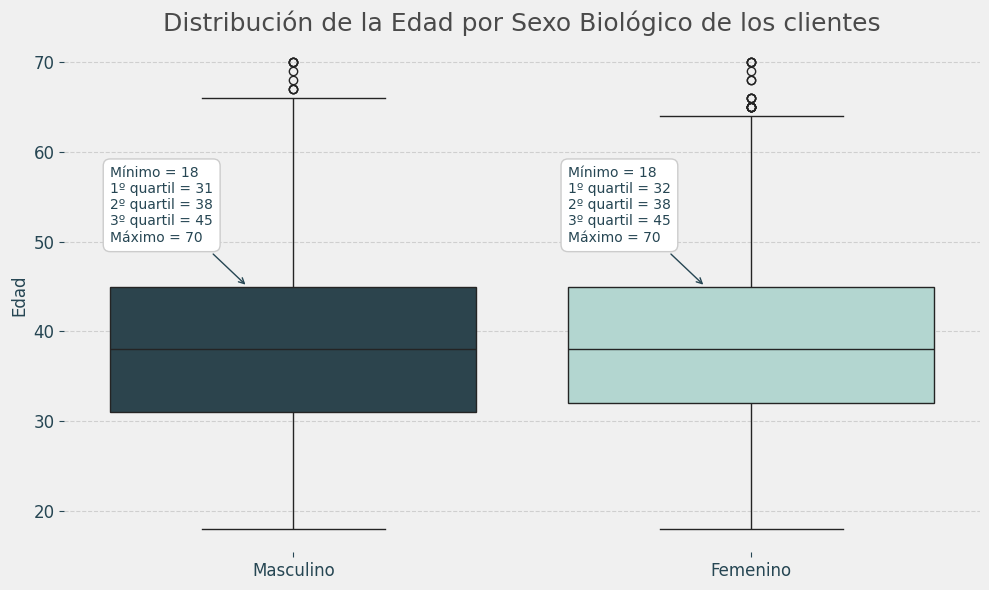

In [490]:
distribucion_sexo().show()

<font color="7b71ff" size=4> Comentarios: </font>

---

Para nuestro √∫ltimo gr√°fico, creamos nuevamente el bloque de anotaciones se√±alando los valores que se muestran en un boxplot. Notamos que la distribuci√≥n entre los clientes de sexo biol√≥gico masculino y femenino es bastante cercana, con solo un a√±o de diferencia en el rango intercuartil (del 1¬∫ al 3¬∫ cuartil) en el caso del sexo biol√≥gico masculino. Zoop tiene en la mediana una clientela de 38 a√±os de edad para ambos sexos.


## **5.4 - Exportando las visualizaciones**

---



¬°Listo! Ahora que hemos finalizado los ajustes de todos los gr√°ficos solicitados, generaremos un √∫ltimo c√≥digo para exportar cada uno de los gr√°ficos que transformamos en funciones en formato de imagen (PNG).

<strong><font color="7b71ff" size =6>Prompt:</font></strong>
Ahora, vamos a nuestra √∫ltima etapa: guardar las visualizaciones como imagen. Coloca cada uno de los gr√°ficos que generamos dentro de una funci√≥n y quiero que se aplique el siguiente procedimiento a cada una de ellas:

```
nombre_imagen = nombre_funcion()
nombre_imagen.savefig('nombre_imagen.png', bbox_inches='tight')
nombre_imagen.close()
```
Las funciones son:


*   metodo_pago()
*   ventas_totales()
*   facturacion_por_categoria()
*   ventas_trimestre_2()
*   cashback_grafico()
*   calificaciones_grafico()
*   distribucion_sexo()

Reemplaza la variable "nombre_imagen" por "grafico_" seguido del nombre de la funci√≥n que genera el gr√°fico.

Utiliza el lenguaje Python para crear el c√≥digo y no mostrar las im√°genes.

In [493]:
def exportar_grafico():
    funciones = [
        metodo_pago,
        ventas_totales,
        facturacion_por_categoria,
        ventas_trimestre_2,
        cashback_grafico,
        calificaciones_grafico,
        distribucion_sexo
    ]

    for funcion in funciones:
        nombre = funcion.__name__
        grafico = funcion()
        grafico.savefig(f"grafico_{nombre}.png", bbox_inches='tight')
        plt.close(grafico)


¬°Ahora es tu turno! ¬øQu√© tal descargar los gr√°ficos y generar un informe con algunos insights y explicando los resultados?

¬°Espero que hayas disfrutado este curso y saques el m√°ximo provecho del contenido!